https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

In [9]:
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']=400
#plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Import data
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)
df.head()

,value
0,88
1,84
2,85
3,85
4,84


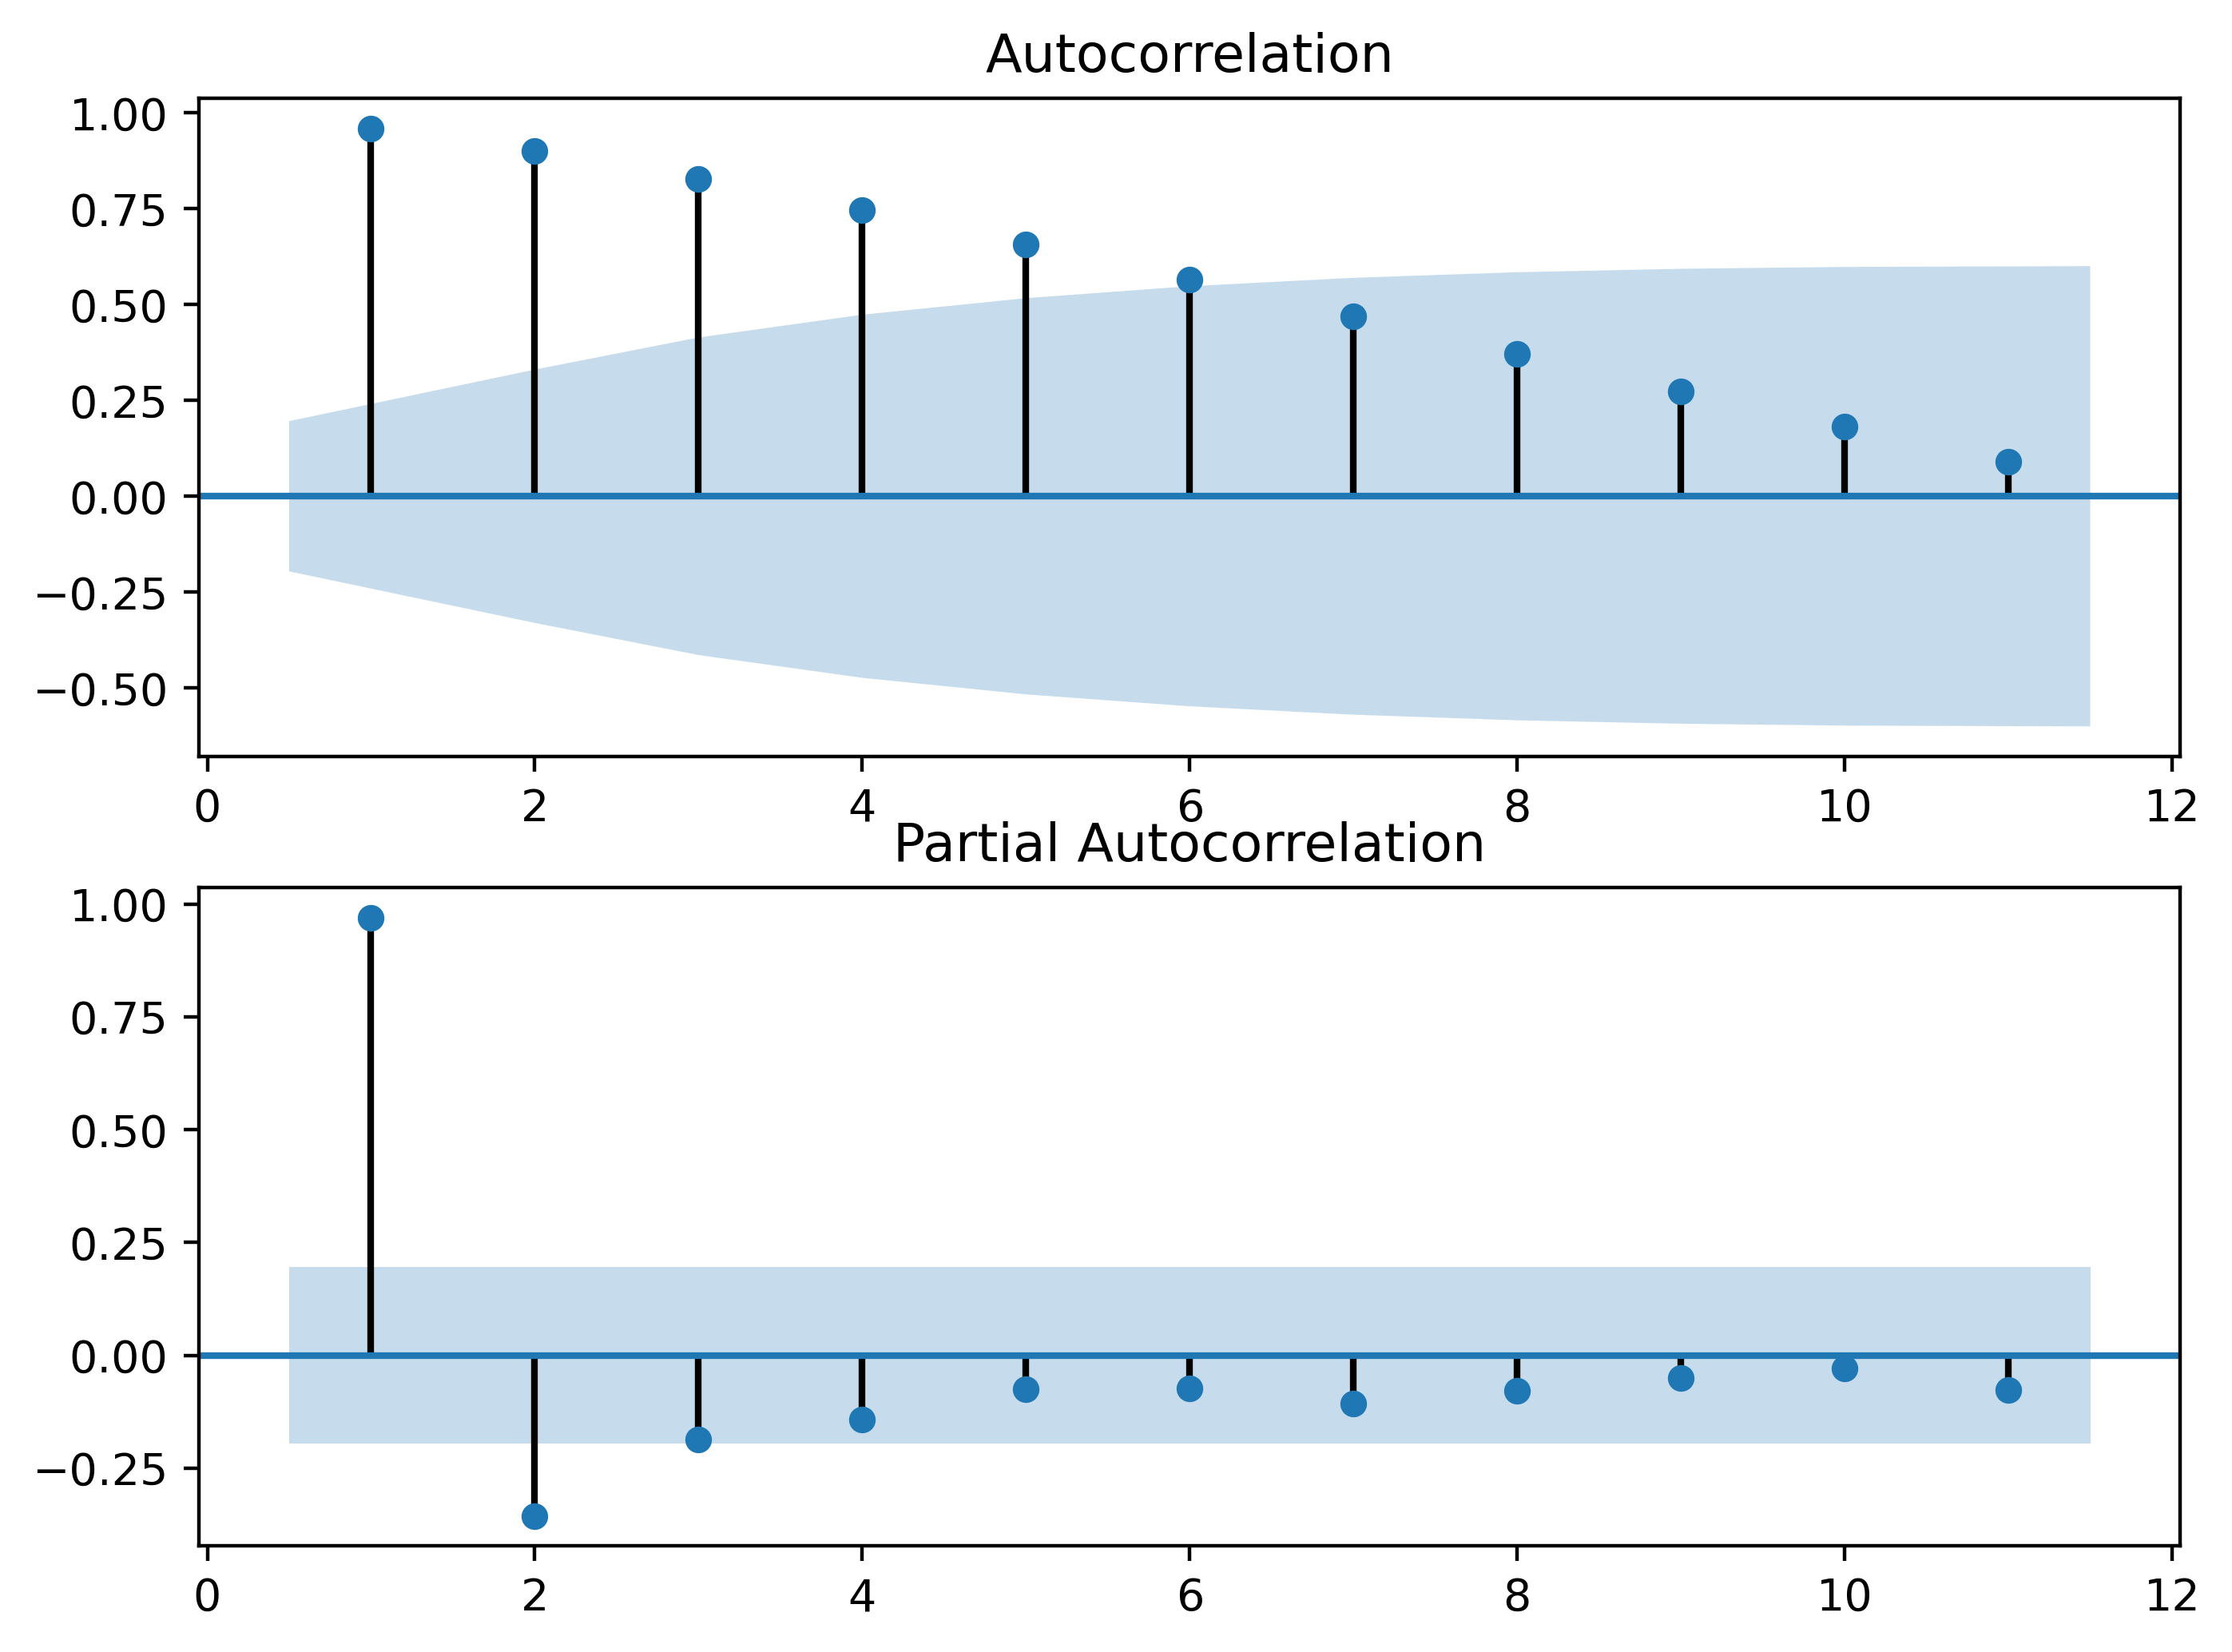

In [5]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6))
plot_acf(df.value, lags=11, zero=False, ax=ax1)
plot_pacf(df.value, lags=11, zero=False, ax=ax2)
plt.show()

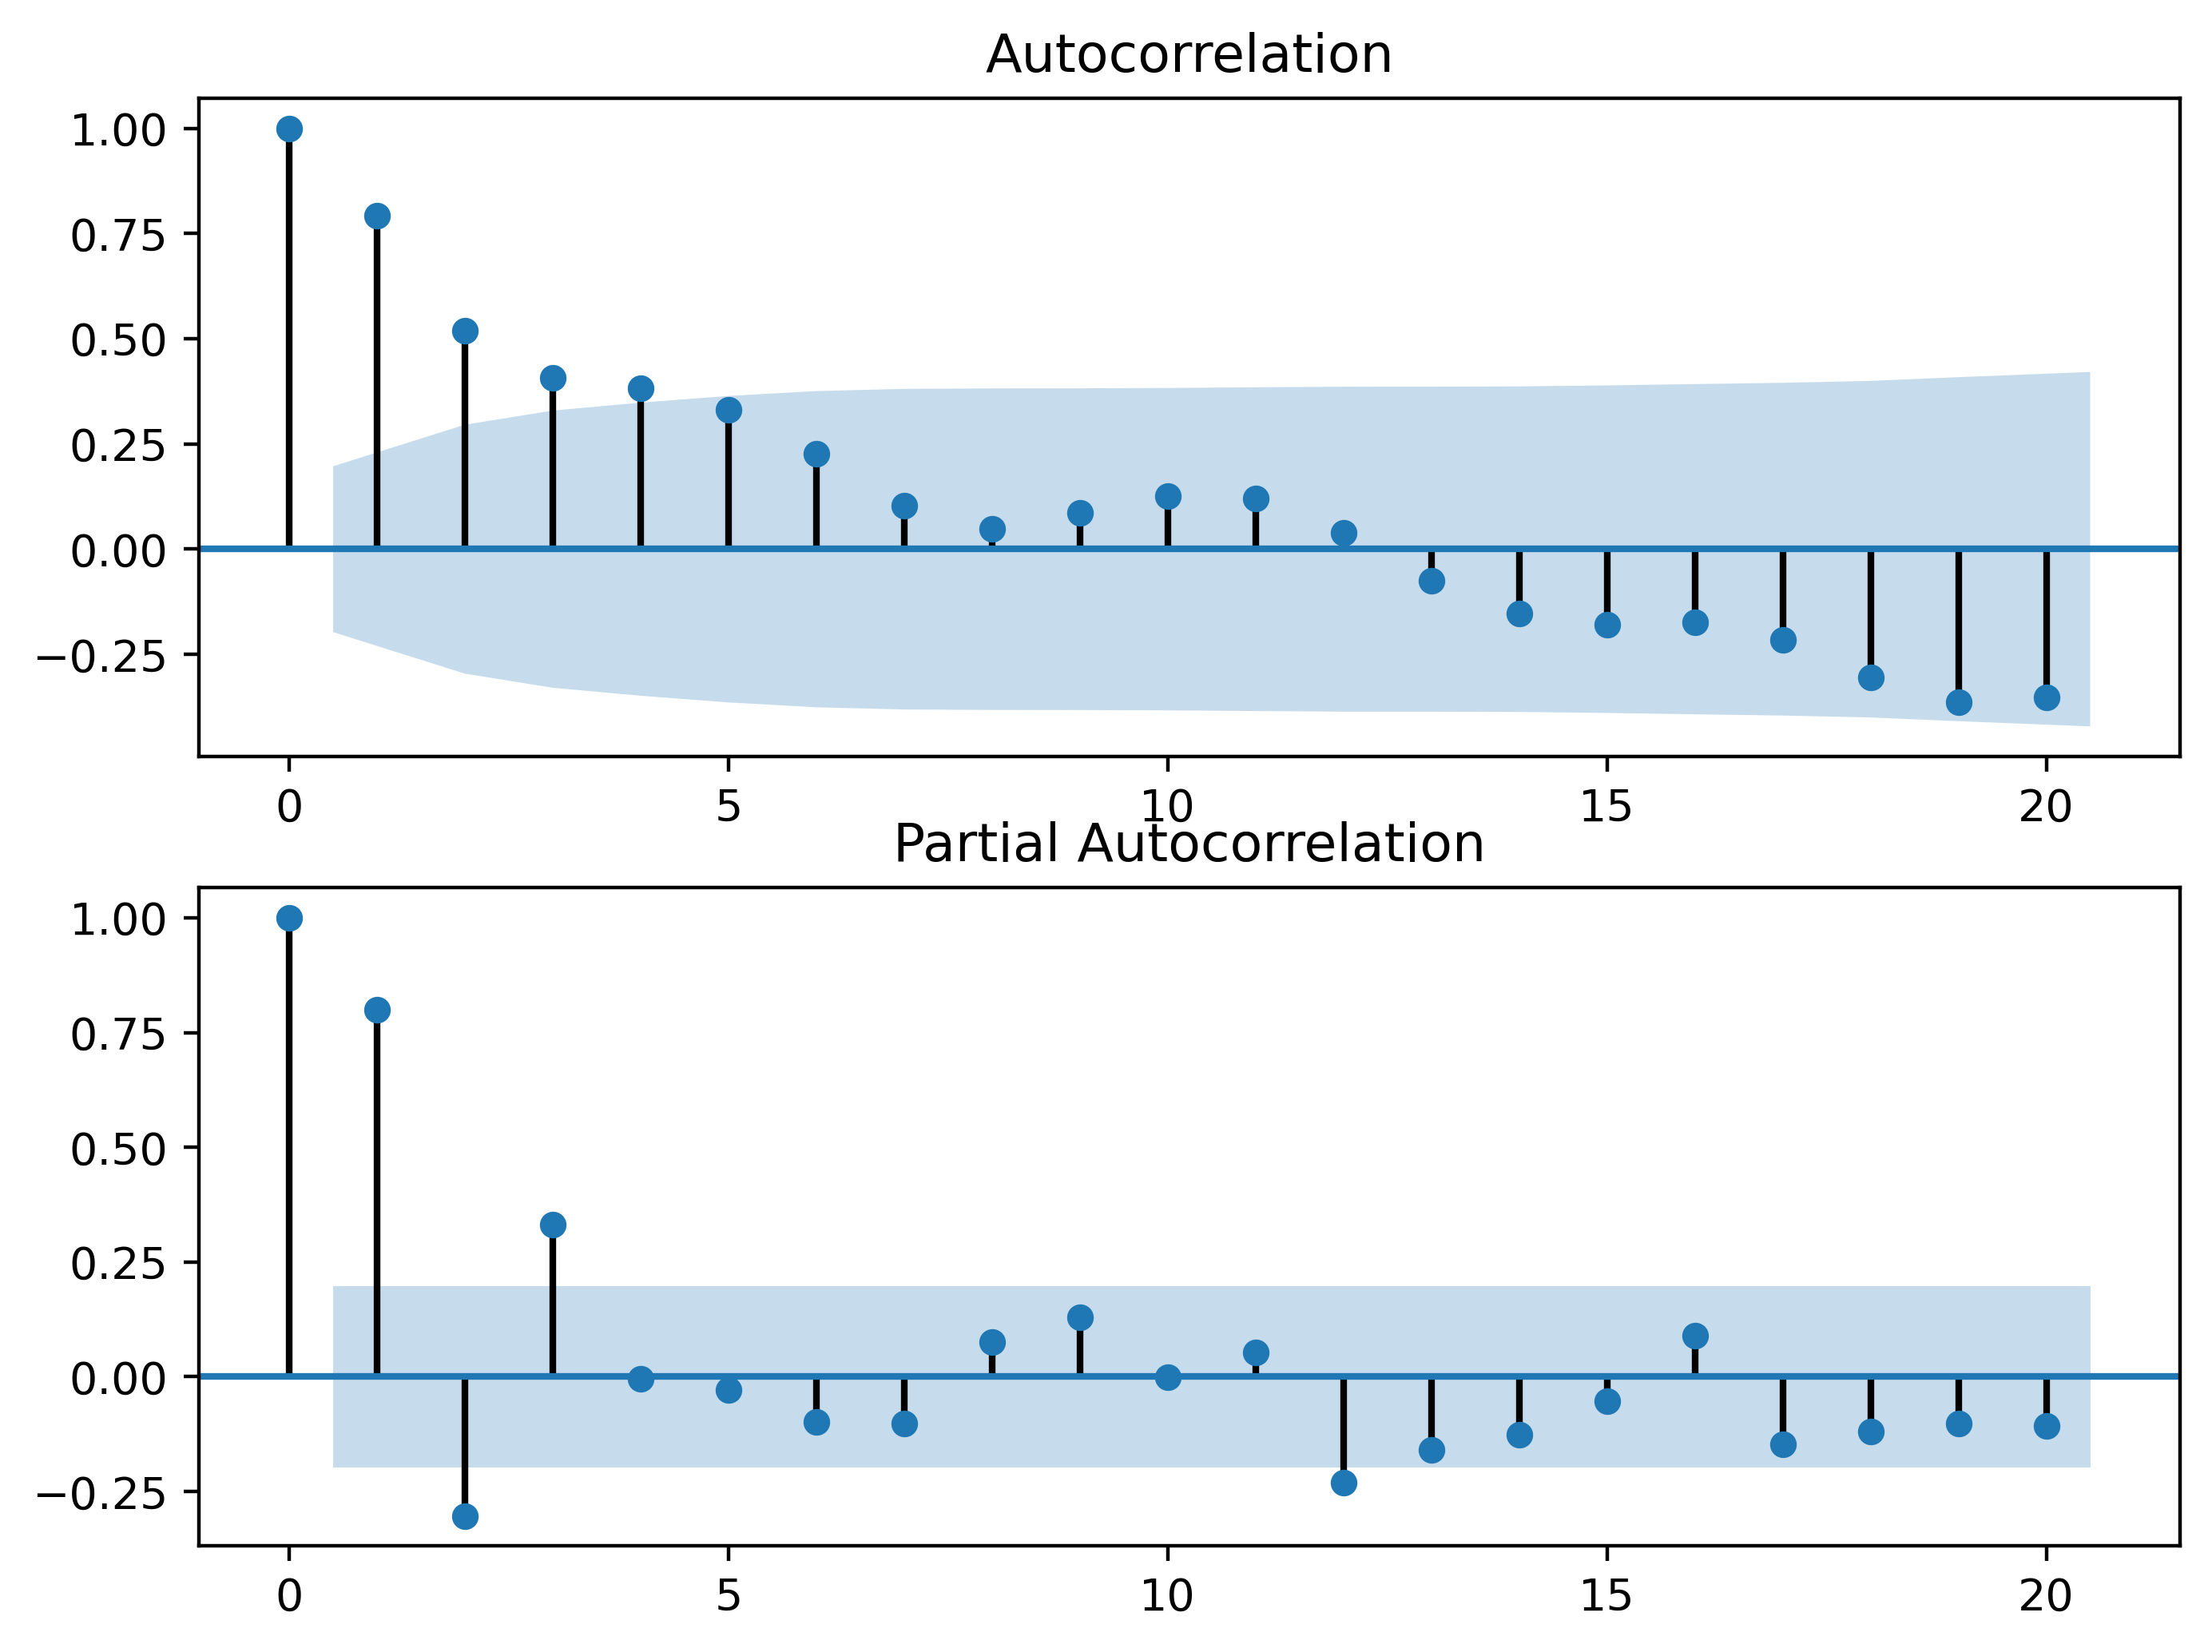

In [6]:
# 1st Differencing
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6))
plot_acf(df.value.diff().dropna(),ax=ax1)
plot_pacf(df.value.diff().dropna(), ax=ax2)
plt.show()

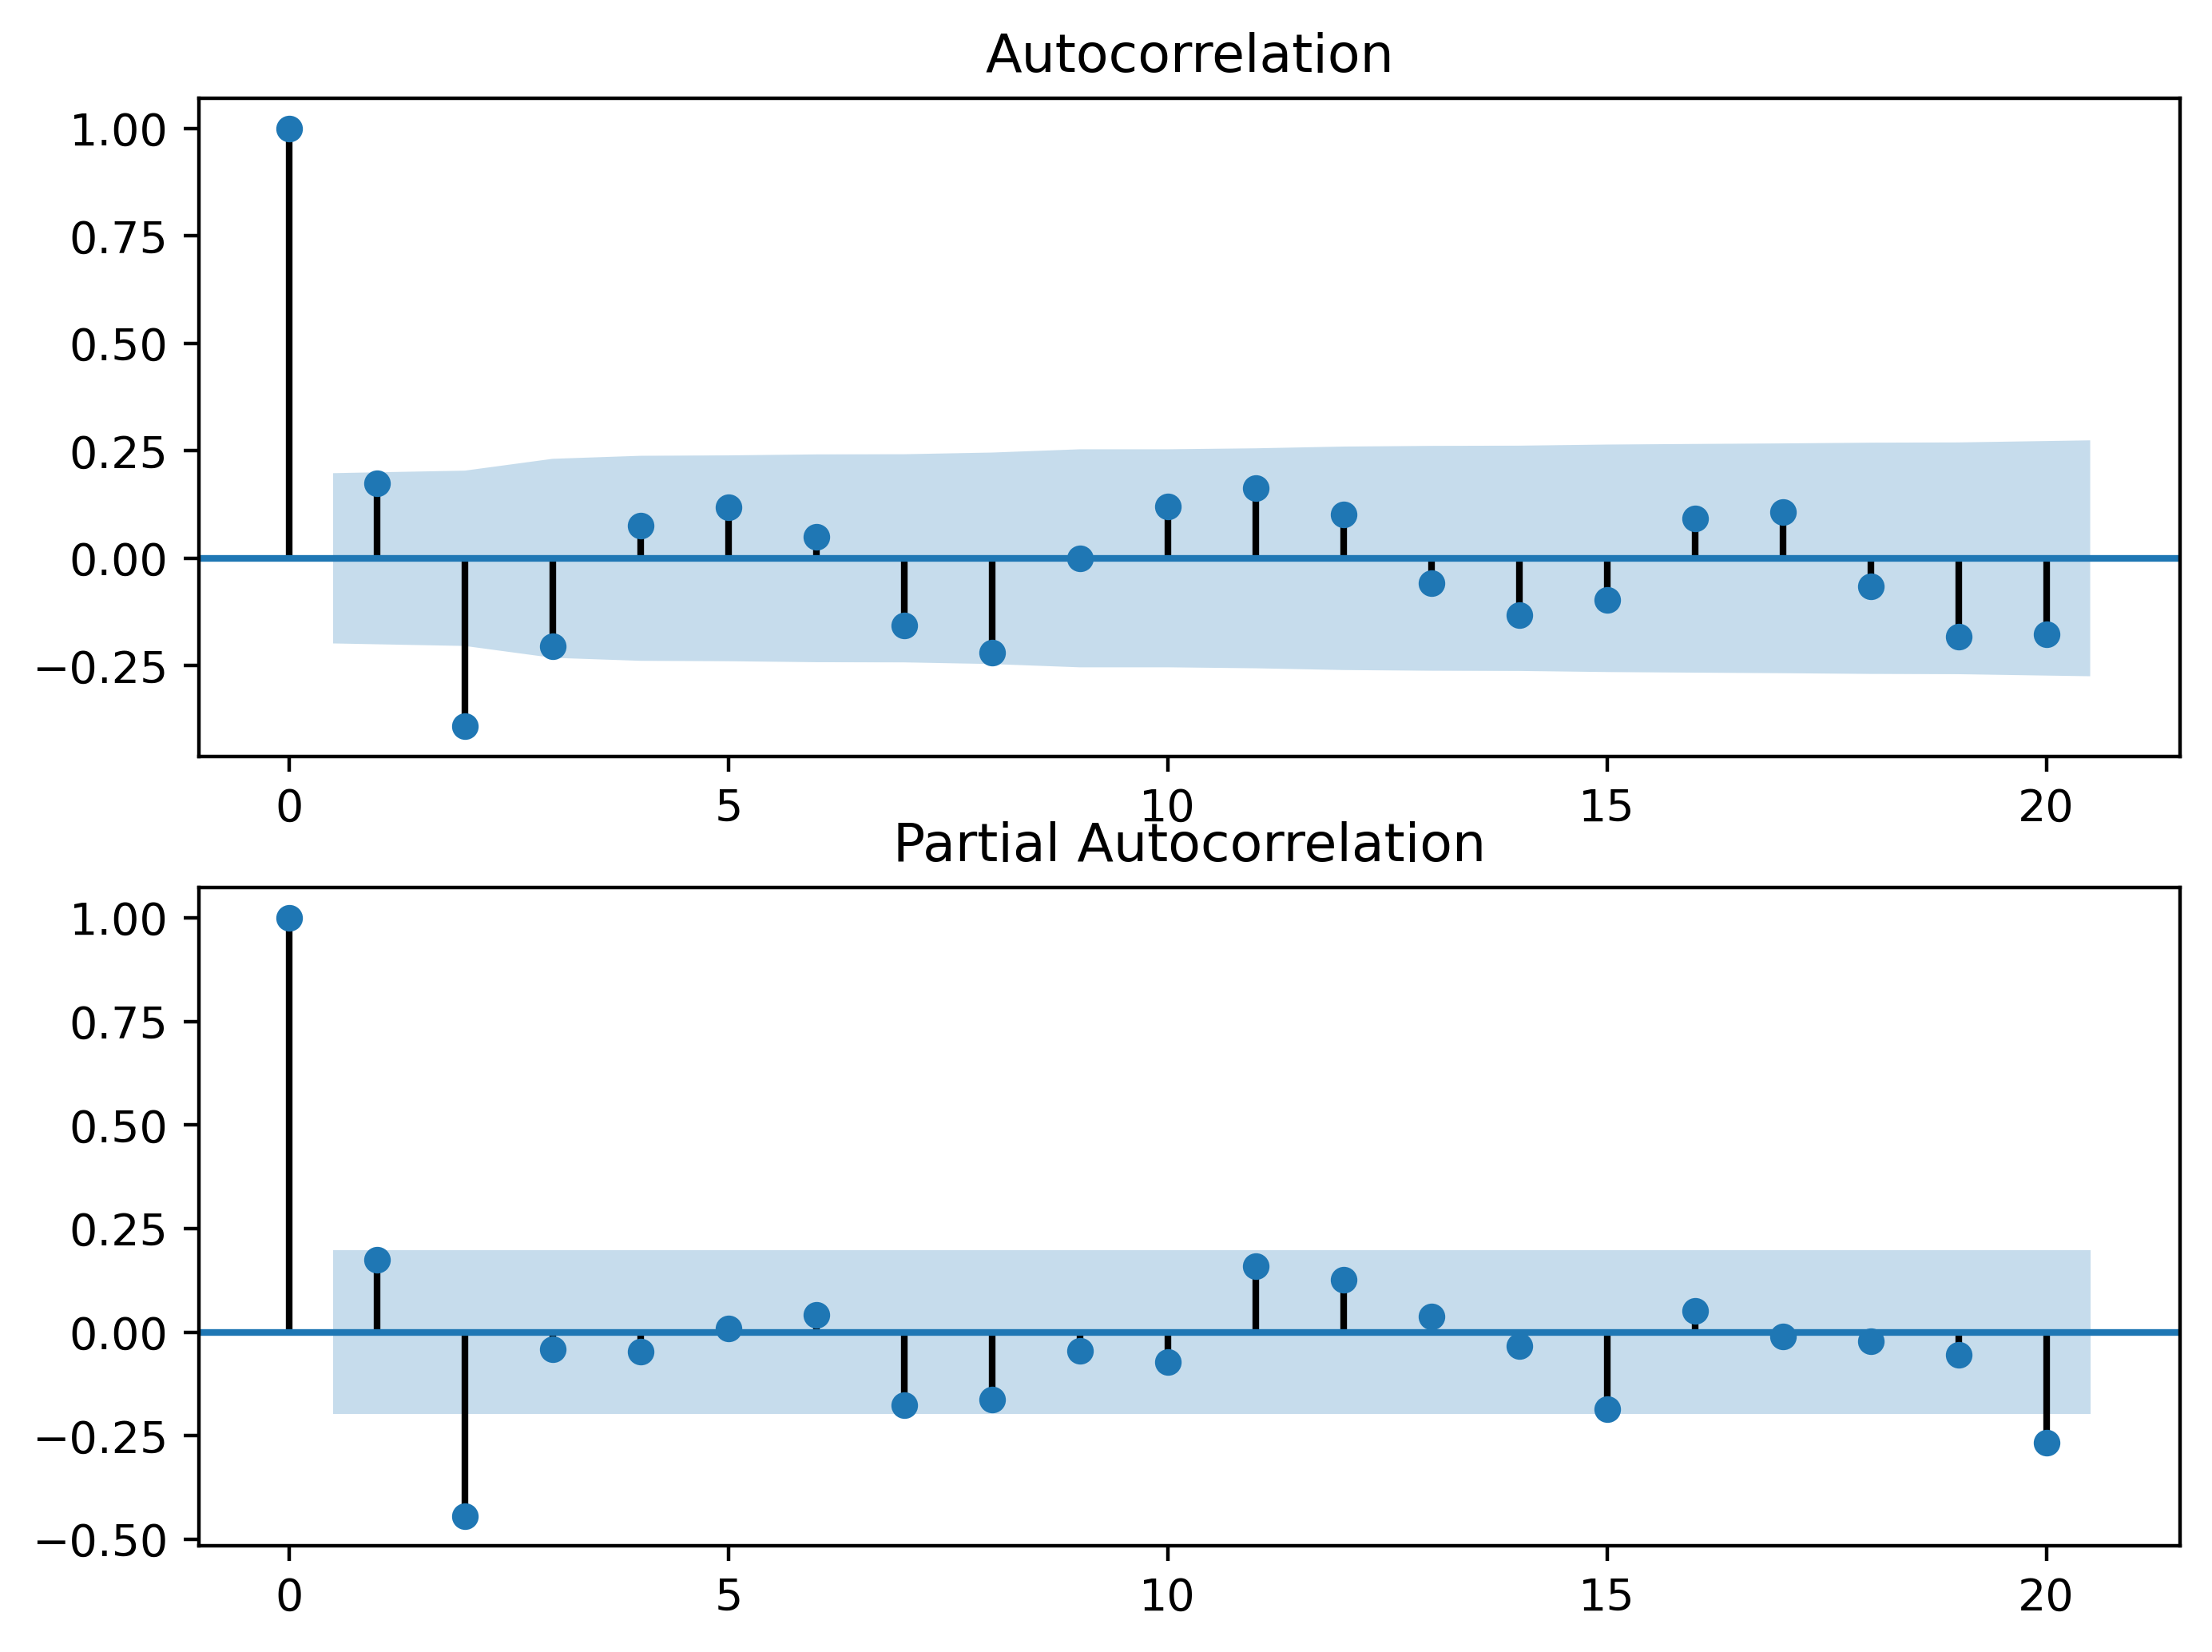

In [7]:
# 1st Differencing
fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6))
plot_acf(df.value.diff().diff().dropna(),ax=ax1)
plot_pacf(df.value.diff().diff().dropna(), ax=ax2)
plt.show()

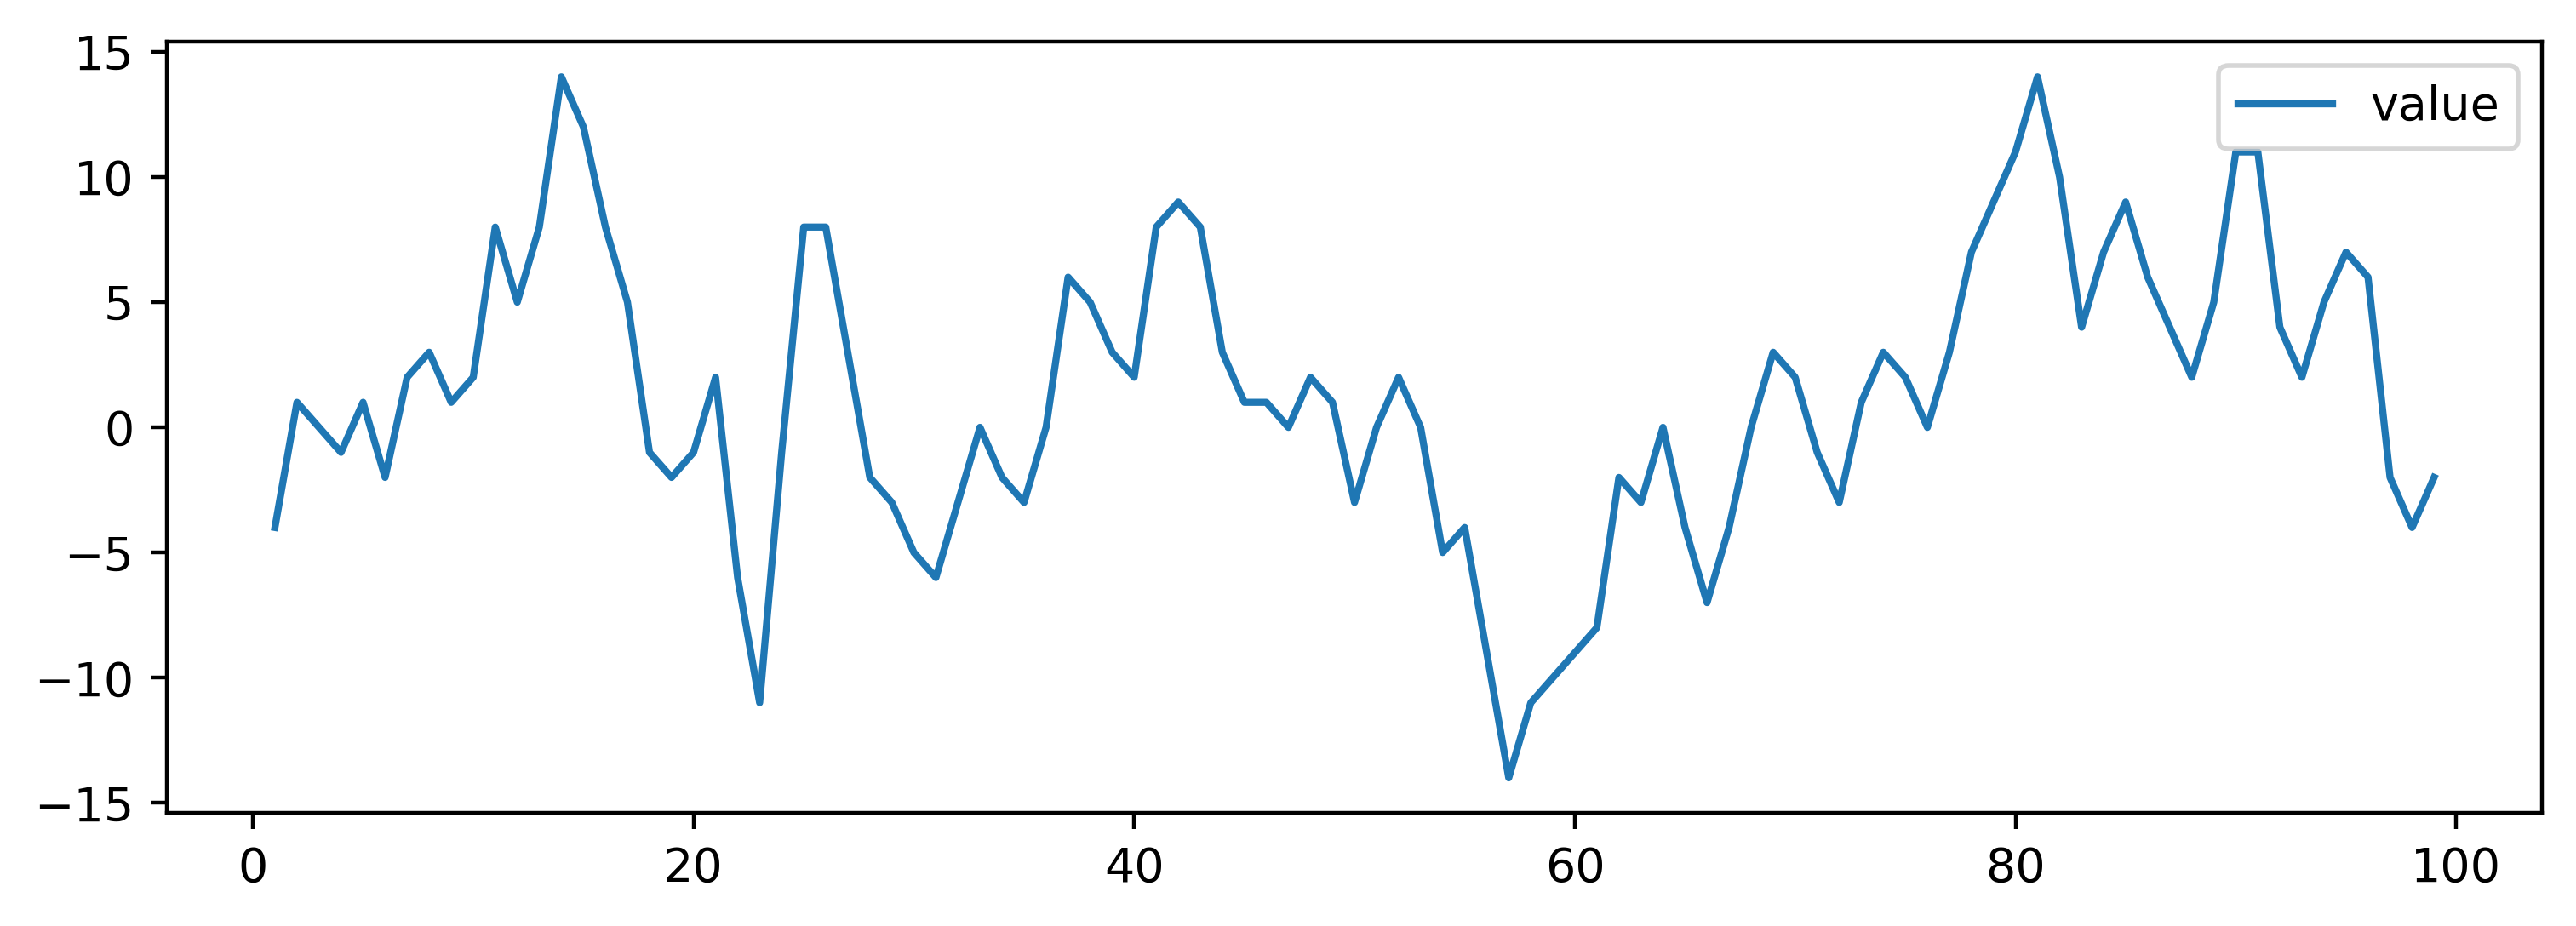

In [11]:
# PACF plot of 1st differenced series
df_diff = df.diff().dropna()
df_diff.plot()

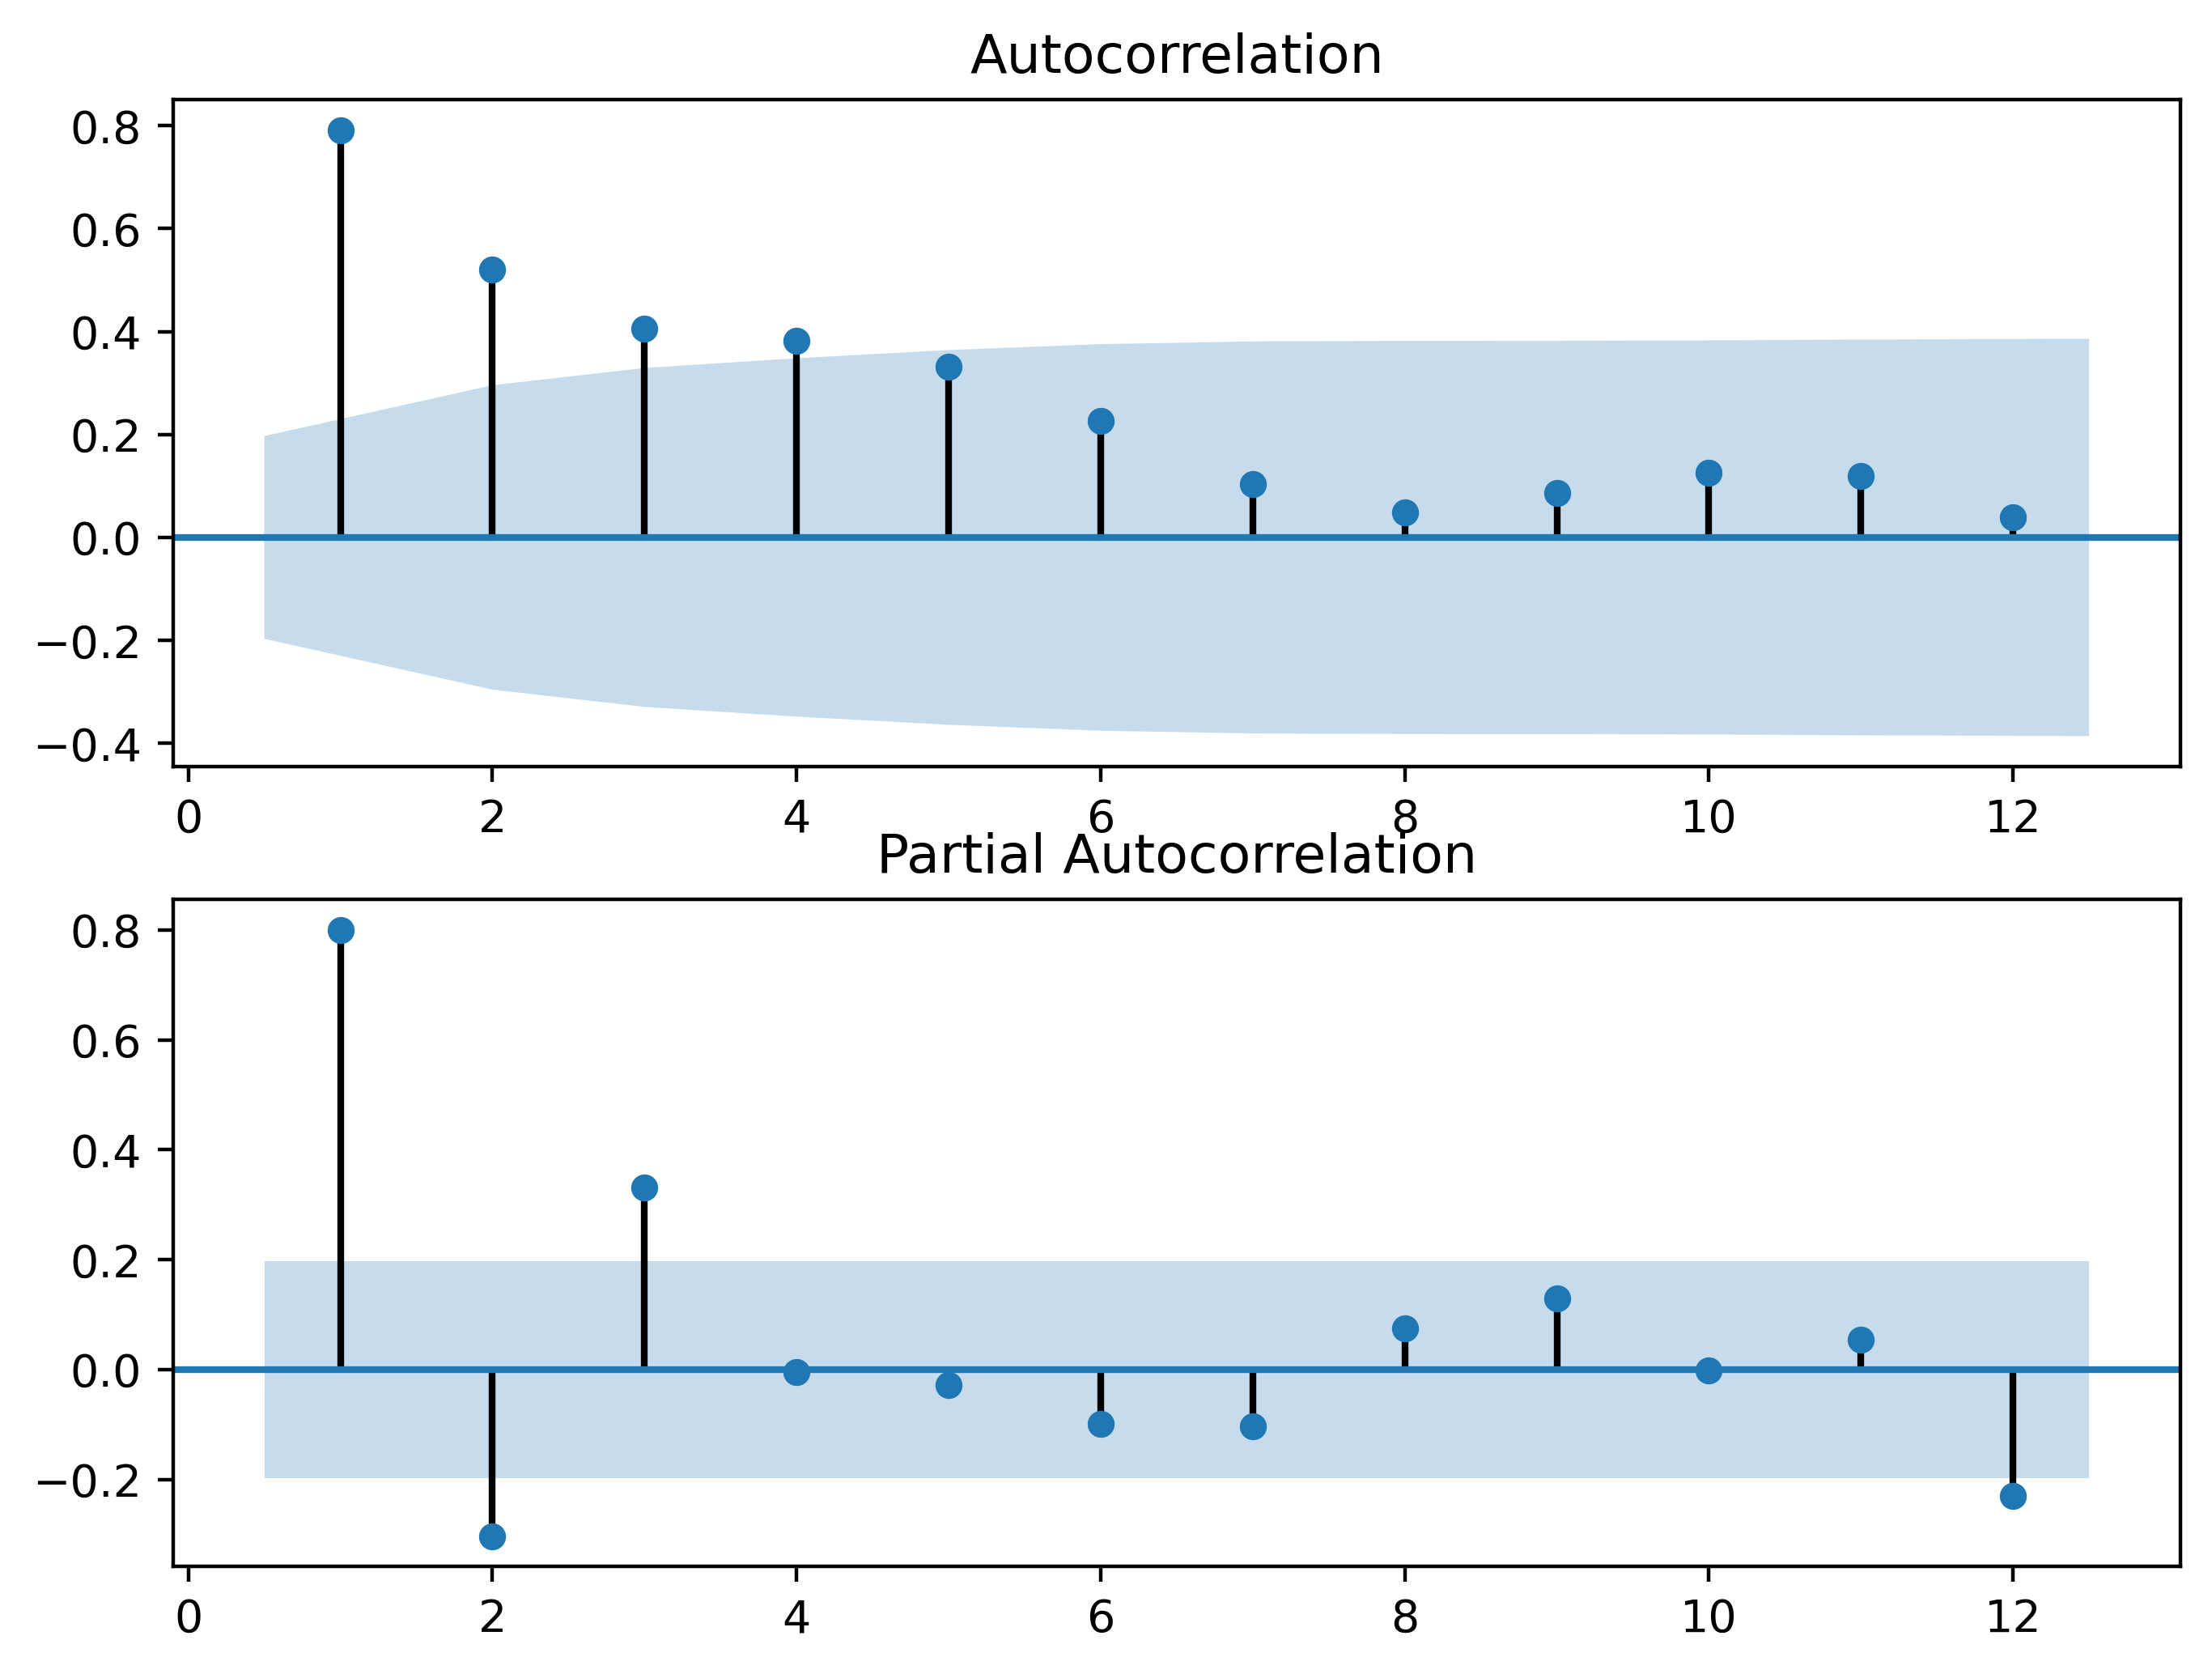

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(2,1,figsize=(8,6))
plot_acf(df_diff, lags=12, zero=False, ax=ax1)
plot_pacf(df_diff, lags=12, zero=False, ax=ax2)
plt.show()

In [57]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
order_aic_bic = []
for p in range(4):
    for i in range(3):
        for q in range(4):
            try:
                model = SARIMAX(df, order=(p,i,q))
                results = model.fit()
                order_aic_bic.append((p,i,q,results.aic,results.bic))
                #print(p,q,results.aic, results.bic)
            except:
                print(p,q,None,None)

order_df = pd.DataFrame(order_aic_bic, columns=['p','i','q', 'AIC', 'BIC'])
print(order_df.sort_values('AIC').reset_index())

C:\Users\psahai\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\psahai\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


3 0 None None


C:\Users\psahai\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\psahai\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\psahai\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


    index  p  i  q          AIC          BIC
0      44  3  2  1   510.712544   523.637381
1      32  2  2  0   511.464783   519.219686
2      39  3  1  0   511.994816   522.375295
3      42  3  1  3   512.078534   530.244373
4      11  0  2  3   512.333237   522.673107
5      45  3  2  2   512.677082   528.186886
6      22  1  2  2   513.188815   523.528684
7      33  2  2  1   513.255933   523.595803
8      43  3  2  0   513.291449   523.631319
9      23  1  2  3   513.851612   526.776450
10     40  3  1  1   513.938500   526.914099
11     17  1  1  1   514.300254   522.085614
12     46  3  2  3   514.306796   532.401568
13     19  1  1  3   514.577247   527.552846
14     34  2  2  2   515.130547   528.055385
15     35  2  2  3   515.733395   531.243200
16     31  2  1  3   515.774231   531.344950
17     41  3  1  2   515.918386   531.489105
18     18  1  1  2   516.252648   526.633128
19     29  2  1  1   516.292220   526.672700
20     30  2  1  2   517.163969   530.139569
21     10 

C:\Users\psahai\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [27]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(df, order=(2,2,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:               D2.value   No. Observations:                   98
Model:                 ARIMA(2, 2, 0)   Log Likelihood                -252.729
Method:                       css-mle   S.D. of innovations              3.182
Date:                Thu, 15 Oct 2020   AIC                            513.459
Time:                        15:13:05   BIC                            523.798
Sample:                             2   HQIC                           517.641
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0210      0.273      0.077      0.939      -0.515       0.557
ar.L1.D2.value     0.2580      0.092      2.818      0.005       0.079       0.437
ar.L2.D2.value    -0.4407      0.091

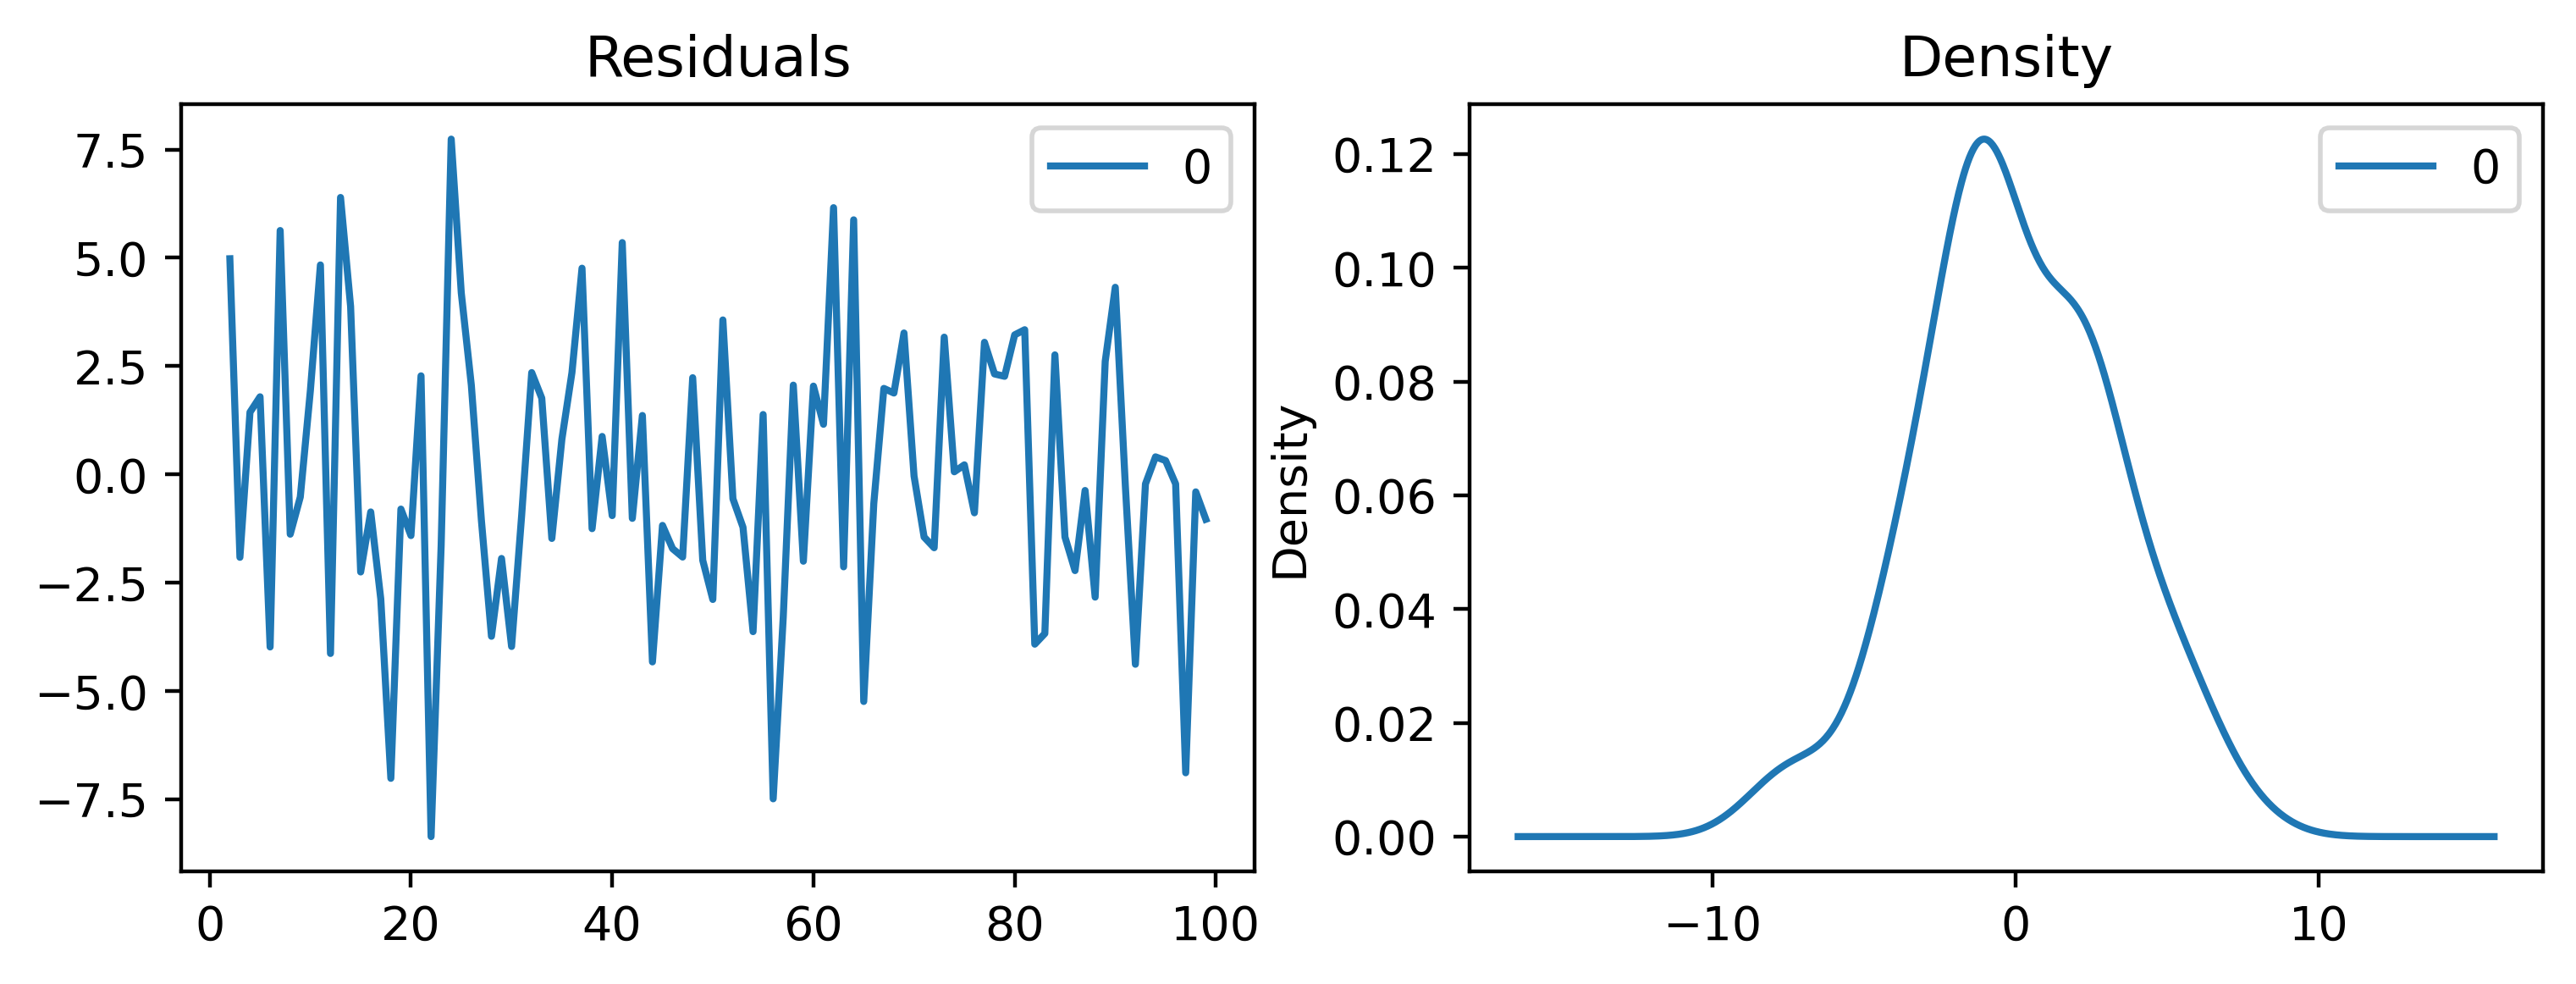

In [28]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

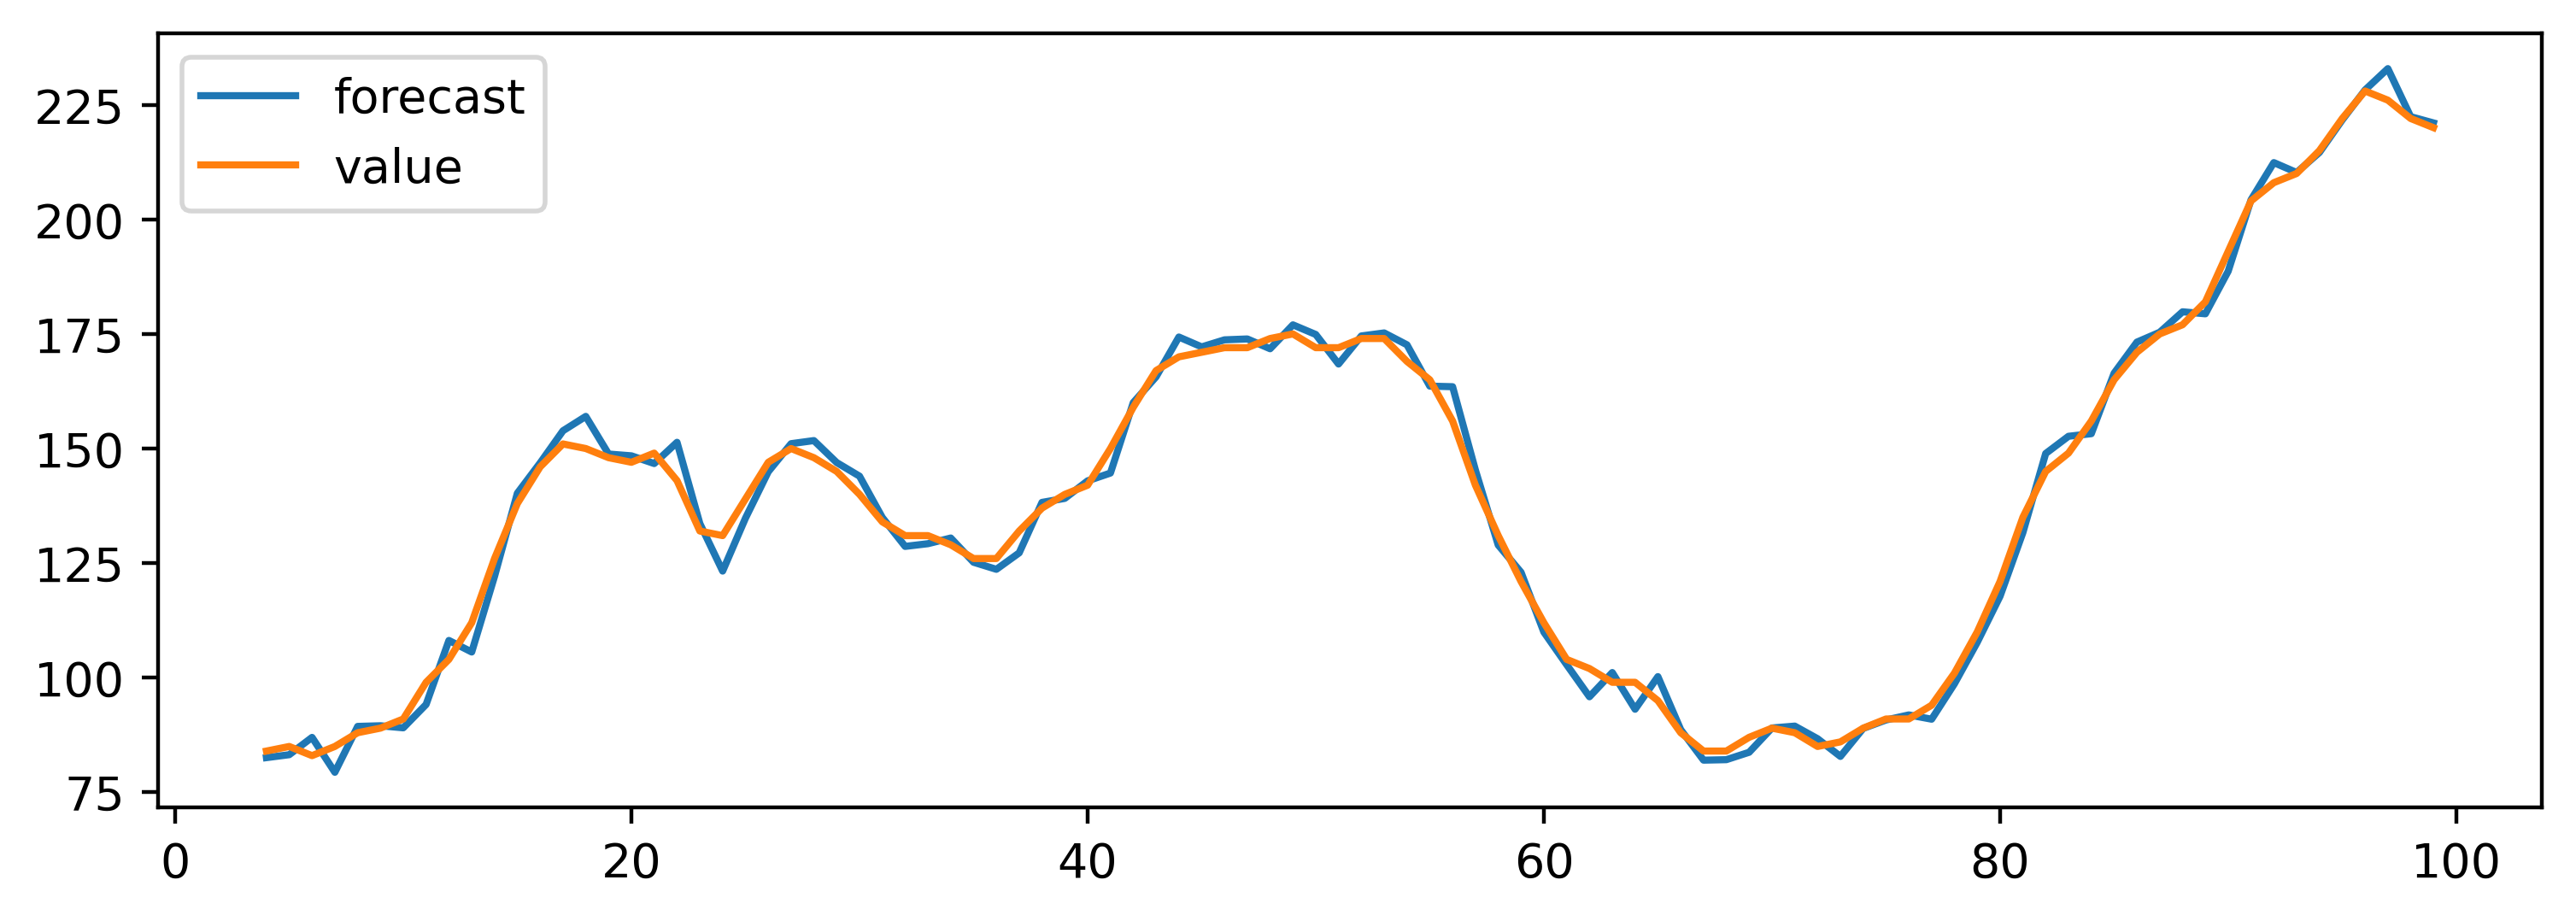

In [29]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [30]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(df, order=(3,2,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:               D2.value   No. Observations:                   98
Model:                 ARIMA(3, 2, 1)   Log Likelihood                -250.276
Method:                       css-mle   S.D. of innovations              3.069
Date:                Thu, 15 Oct 2020   AIC                            512.552
Time:                        15:13:12   BIC                            528.062
Sample:                             2   HQIC                           518.825
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0234      0.058      0.404      0.686      -0.090       0.137
ar.L1.D2.value     1.1586      0.097     11.965      0.000       0.969       1.348
ar.L2.D2.value    -0.6640      0.136

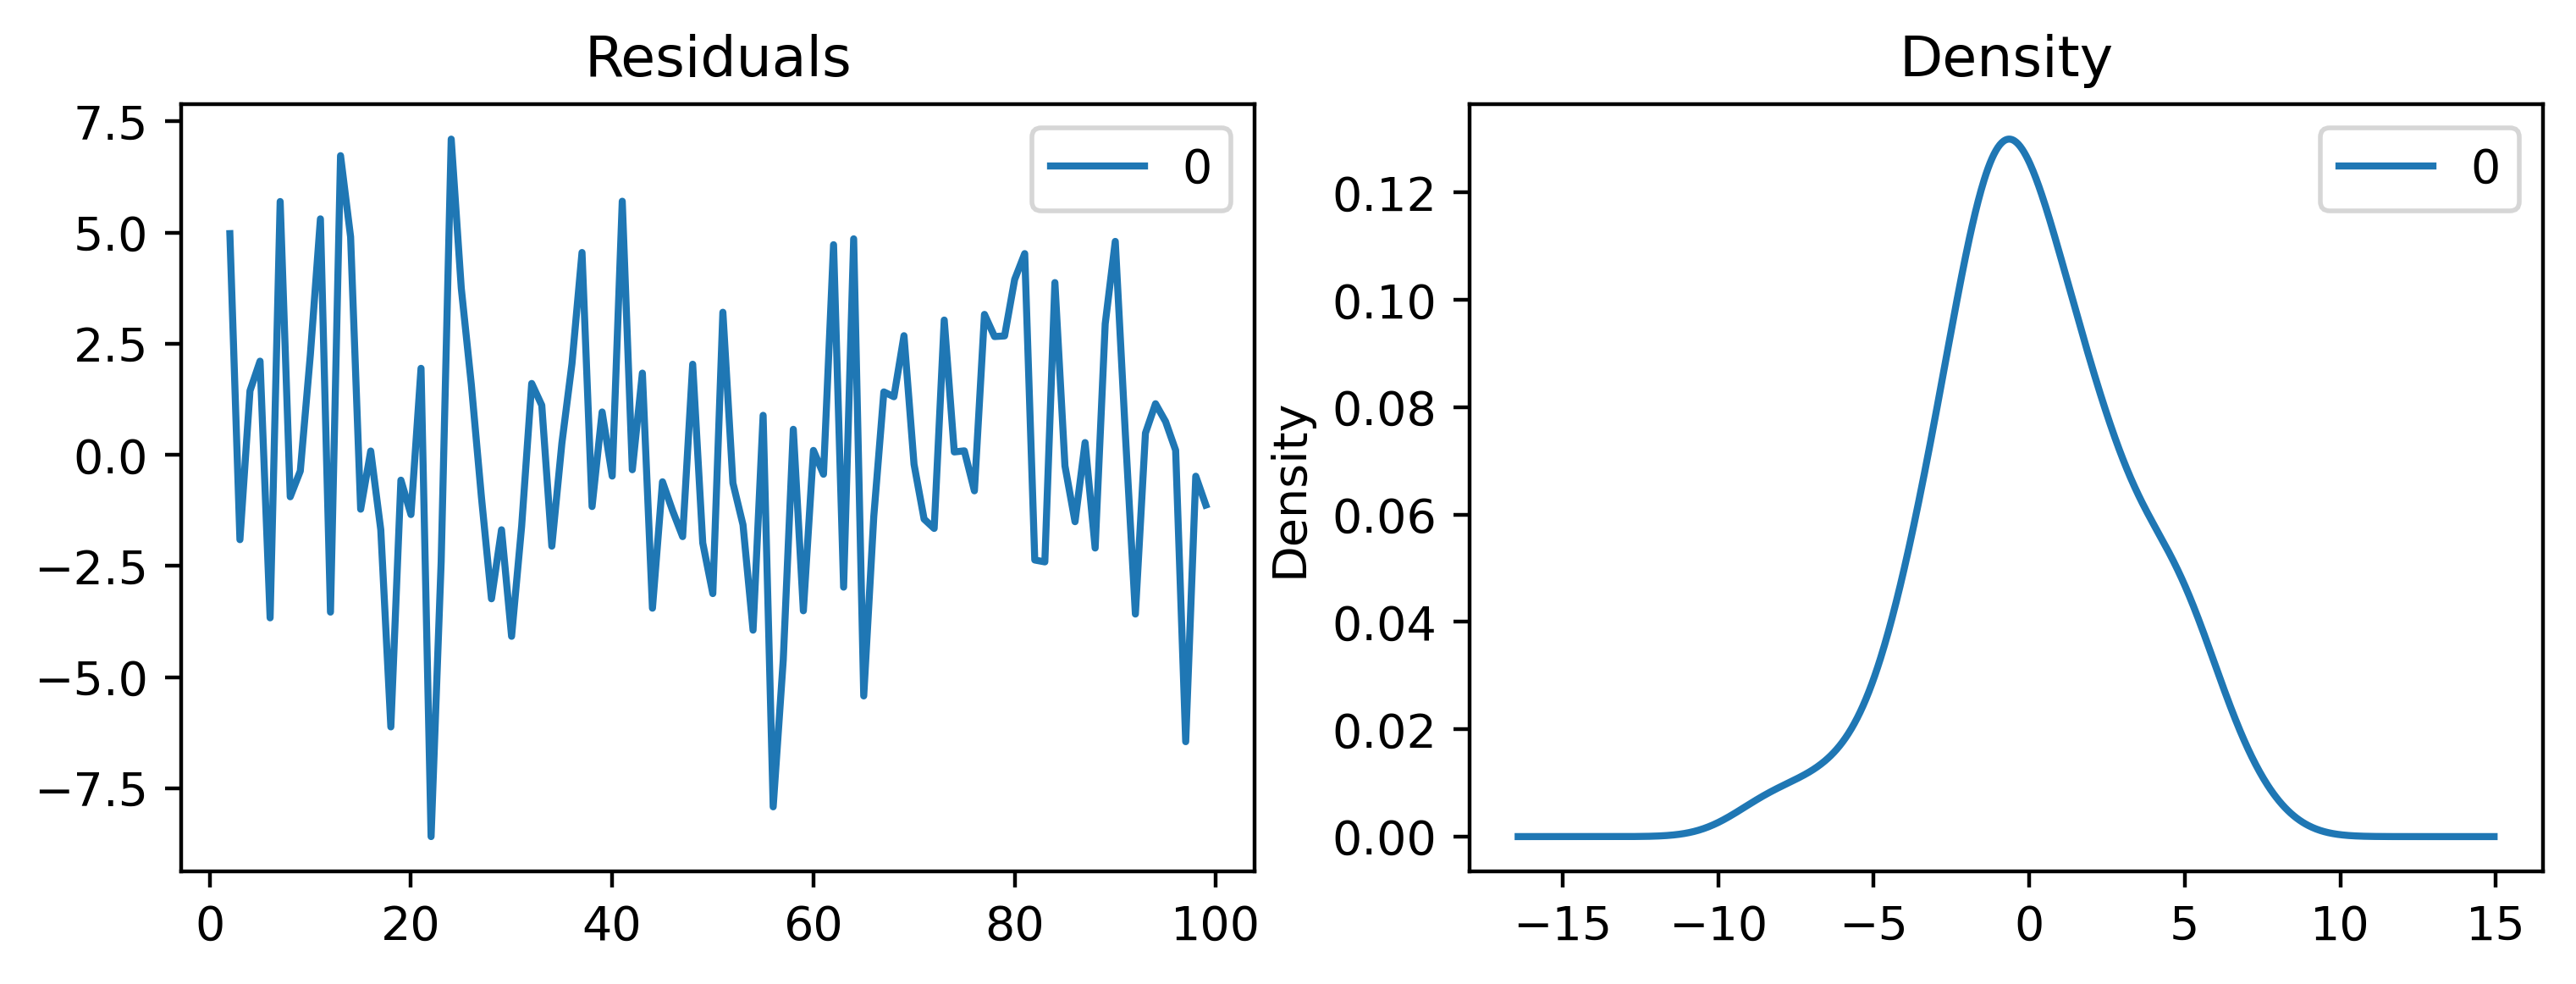

In [31]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

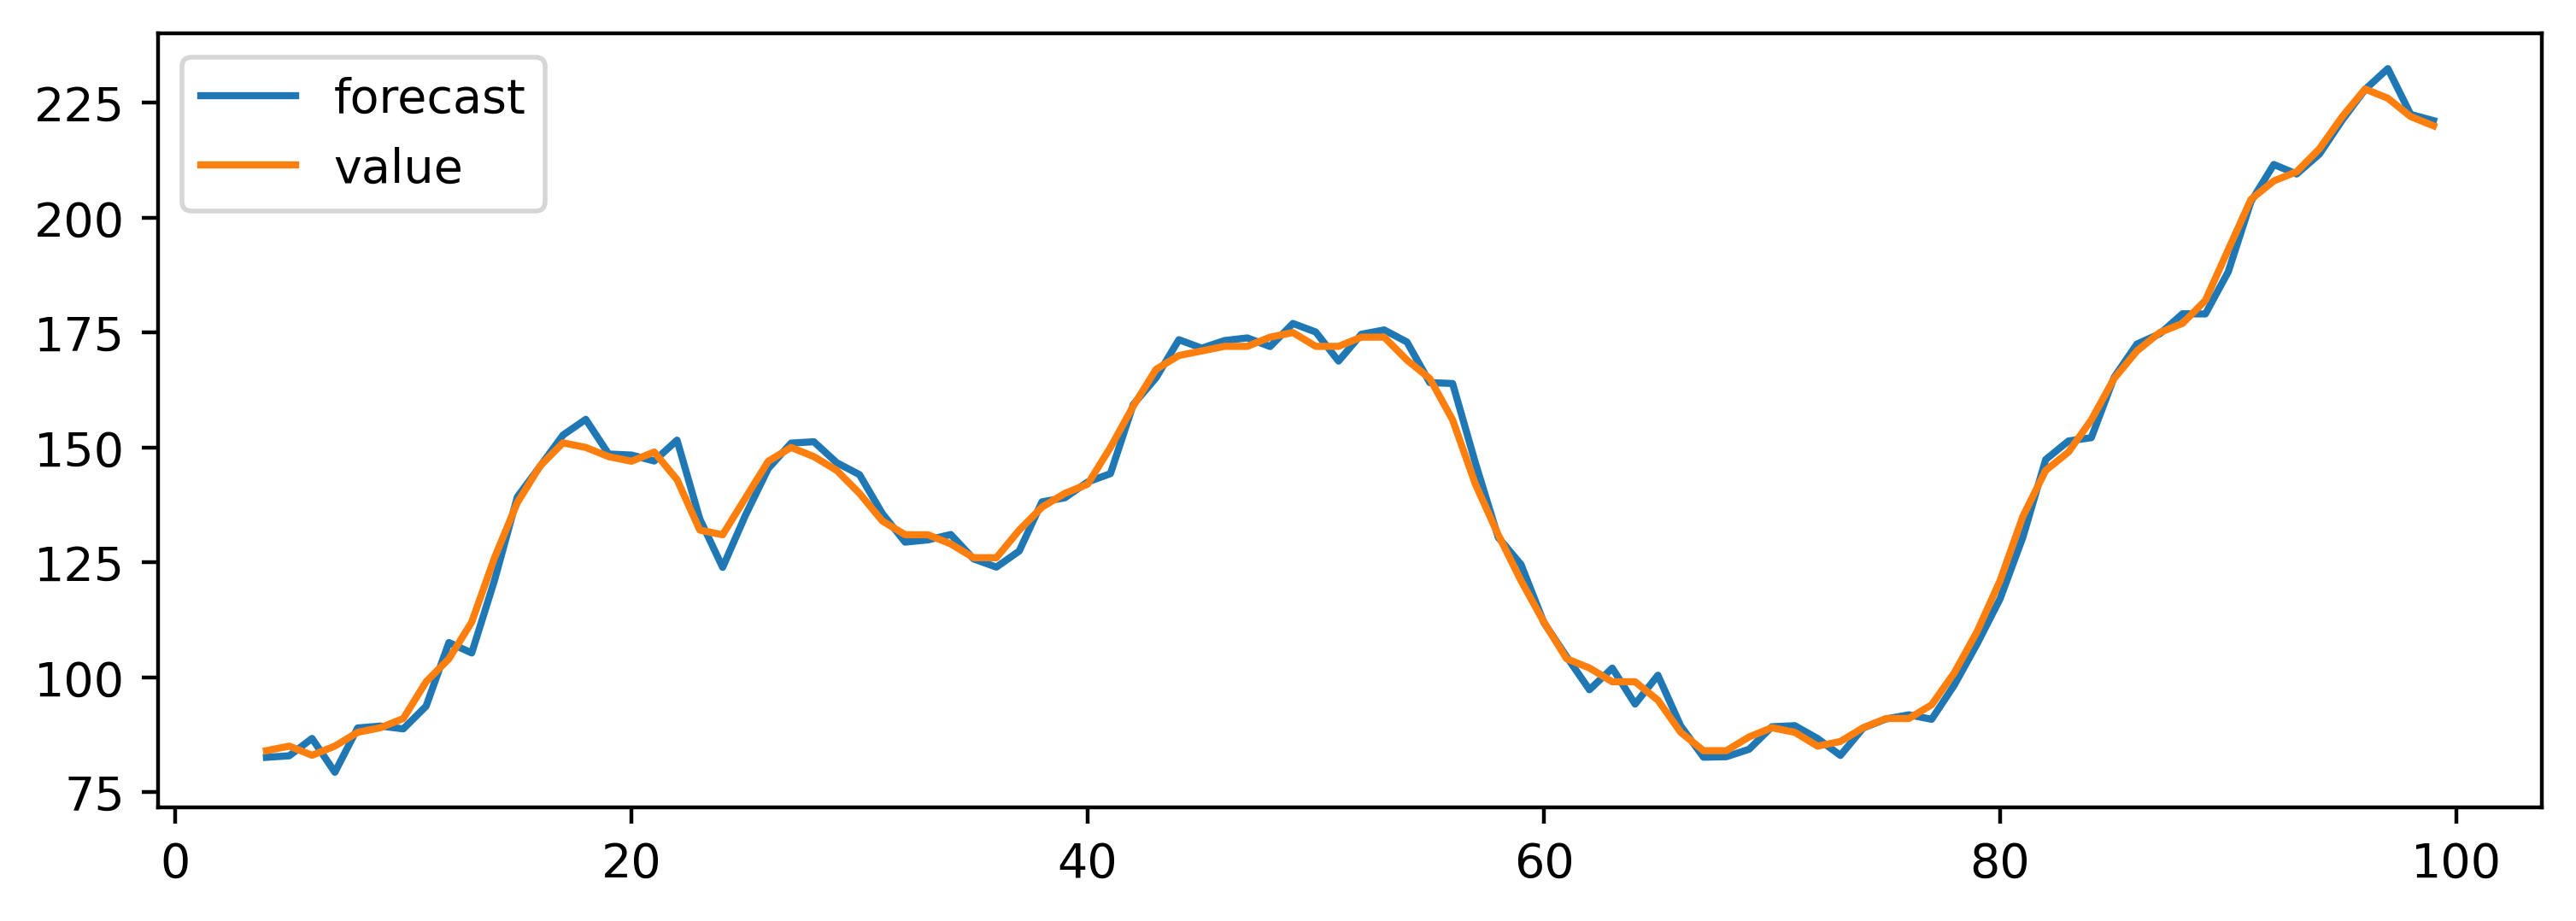

In [32]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [56]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df.value[:85]
test = df.value[85:]
# Build Model
model = ARIMA(train, order=(3,2,1))  
#model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(15, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

NameError: name 'SARIMA' is not defined

In [54]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

C:\Users\psahai\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


{'mape': 0.022501320639815293,
 'me': 3.230787446595288,
 'mae': 4.548323646576828,
 'mpe': 0.01642102225925985,
 'rmse': 6.373241132743812,
 'acf1': 0.5105505497543064,
 'corr': 0.9674576522618462,
 'minmax': 0.021631554023586075}

In [63]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)

model = pm.auto_arima(df.value, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=525.587, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=533.474, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=532.437, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=525.893, Time=0.04 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=531.477, Time=0.01 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=515.248, Time=0.06 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=513.459, Time=0.05 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=515.284, Time=0.07 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=511.465, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=530.444, Time=0.01 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=513.291, Time=0.04 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=513.256, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=523.592, Time=0.03 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time

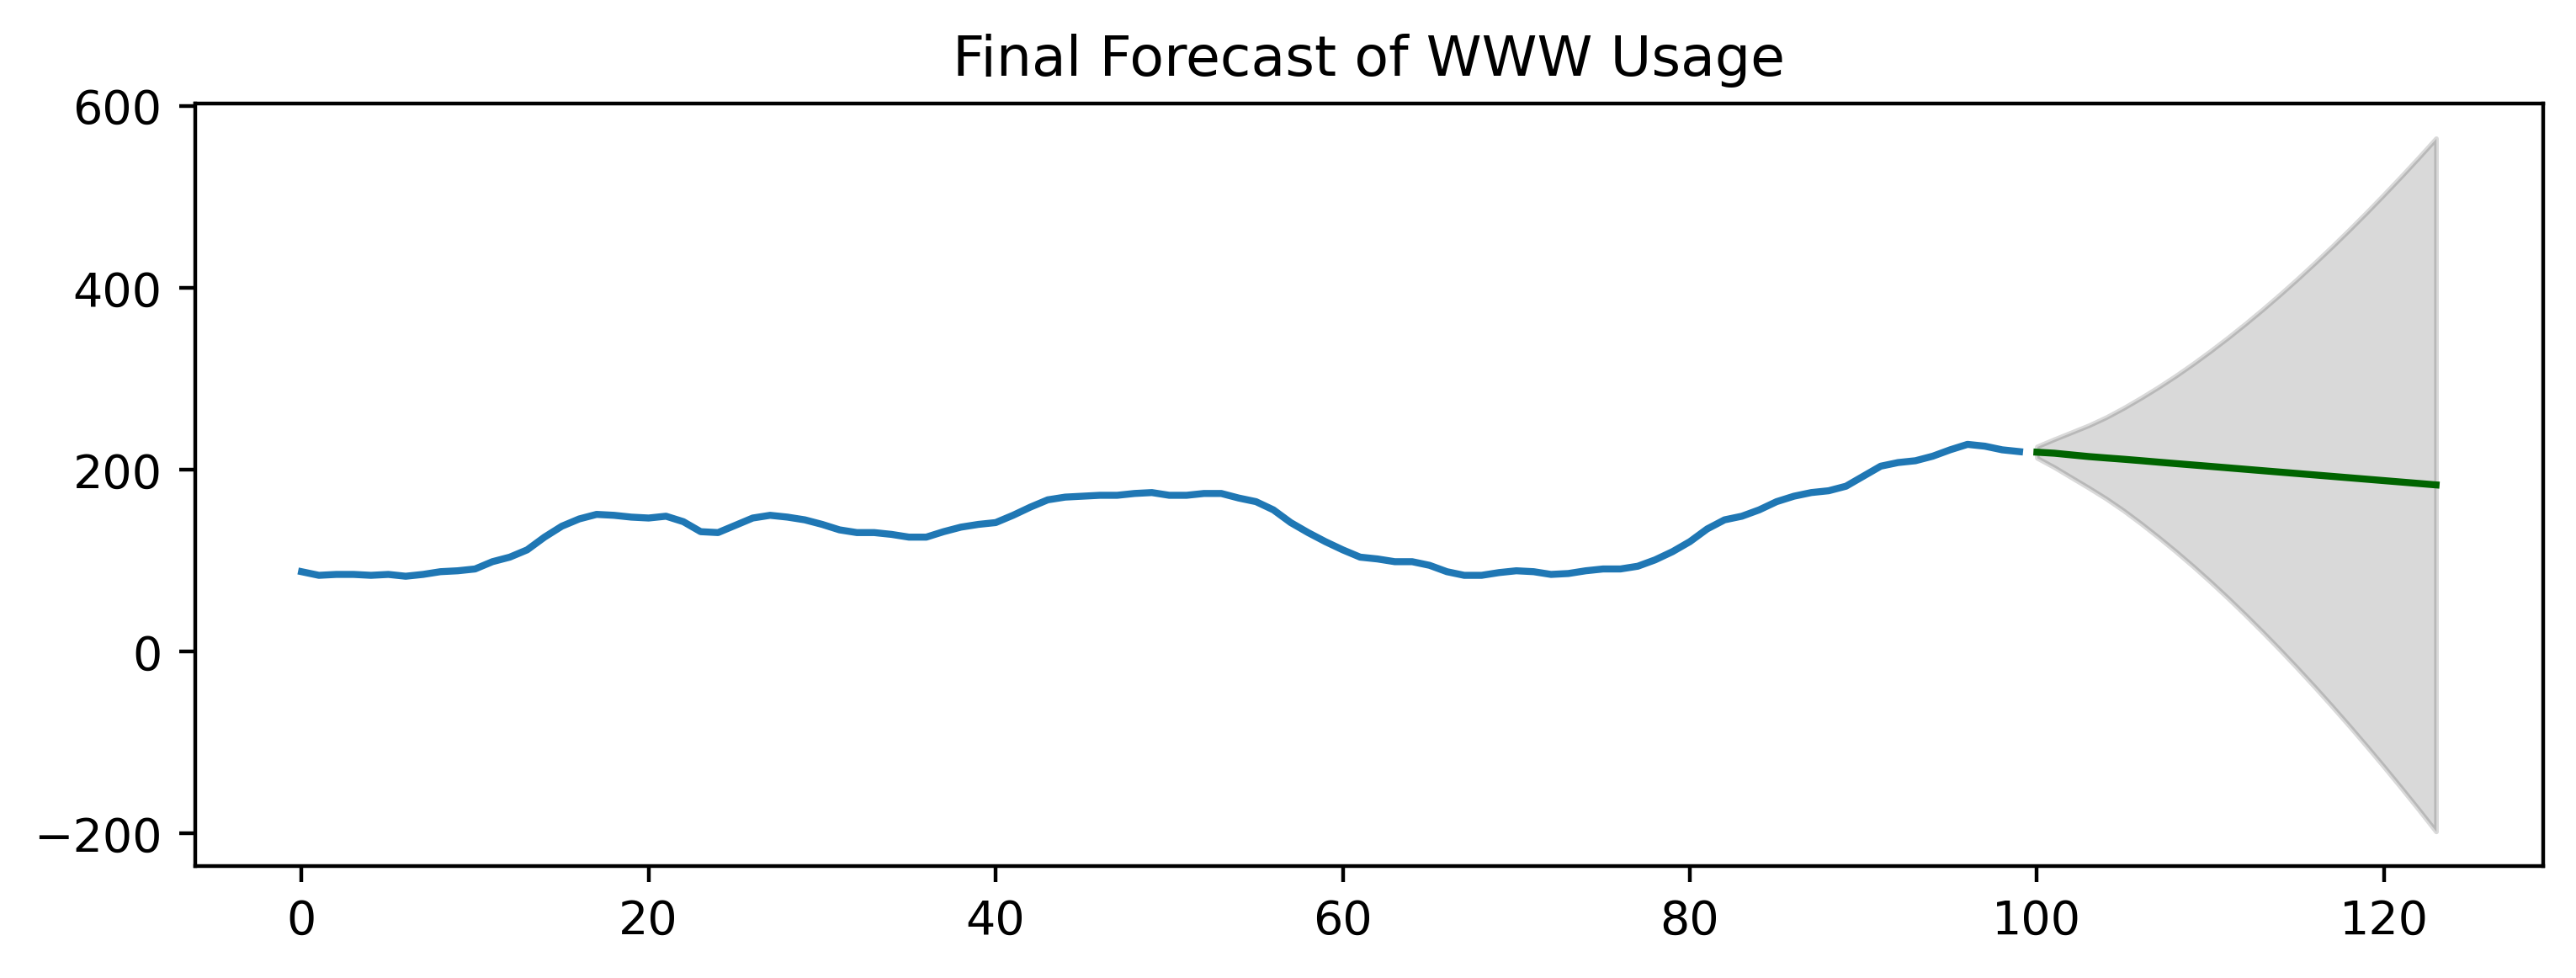

In [65]:
# Forecast
n_periods = 24
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df.value), len(df.value)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(df.value)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of WWW Usage")
plt.show()

In [76]:
employment = [[374.5],
       [380.2],
       [384.6],
       [360.6],
       [354.4],
       [357.4],
       [367. ],
       [375.7],
       [381. ],
       [381.2],
       [383. ],
       [384.3],
       [387. ],
       [391.7],
       [396. ],
       [374. ],
       [370.4],
       [373.2],
       [381.1],
       [389.9],
       [394.6],
       [394. ],
       [397. ],
       [397.2],
       [399.4]]
employment = [x.pop() for x in employment]
dates = pd.date_range(start ='1973-10-01',  
         end ='1975-11-01', freq ='1M')
dic = {'dates':dates, 'employment':employment}
wisconsin_test = pd.DataFrame(dic)
wisconsin_test.set_index('dates', inplace=True)
wisconsin_test.head()
data=wisconsin_test

In [75]:
# Import
data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
data.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


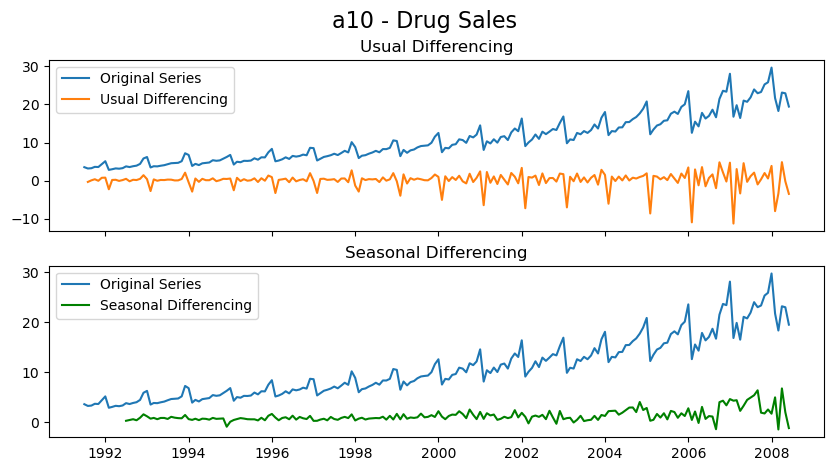

In [73]:
fig, axes = plt.subplots(2, 1, figsize=(10,5), dpi=100, sharex=True)

# Usual Differencing
axes[0].plot(data[:], label='Original Series')
axes[0].plot(data[:].diff(1), label='Usual Differencing')
axes[0].set_title('Usual Differencing')
axes[0].legend(loc='upper left', fontsize=10)


# Seasinal Dei
axes[1].plot(data[:], label='Original Series')
axes[1].plot(data[:].diff(12), label='Seasonal Differencing', color='green')
axes[1].set_title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)
plt.suptitle('a10 - Drug Sales', fontsize=16)
plt.show()

In [77]:
# !pip3 install pyramid-arima
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(data, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,1,1)[12]             : AIC=inf, Time=0.29 sec
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=43.914, Time=0.02 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=inf, Time=0.43 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=inf, Time=0.17 sec
 ARIMA(0,2,0)(1,1,0)[12]             : AIC=45.914, Time=0.03 sec
 ARIMA(0,2,0)(0,1,1)[12]             : AIC=45.914, Time=0.04 sec
 ARIMA(0,2,0)(1,1,1)[12]             : AIC=47.914, Time=0.07 sec
 ARIMA(1,2,0)(0,1,0)[12]             : AIC=45.657, Time=0.01 sec
 ARIMA(0,2,1)(0,1,0)[12]             : AIC=inf, Time=0.06 sec
 ARIMA(1,2,1)(0,1,0)[12]             : AIC=inf, Time=0.17 sec
 ARIMA(0,2,0)(0,1,0)[12] intercept   : AIC=45.906, Time=0.00 sec

Best model:  ARIMA(0,2,0)(0,1,0)[12]          
Total fit time: 1.302 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   25
Model:             SARIMAX(0, 2, 0)x(0, 1, 0, 12)   Log Likelihood                 -20.957
Date:                            Thu, 15 Oct 2020   AIC                             43.914
Time:                                    16:01:25   BIC                             44.312
Sample:                                         0   HQIC                            43.663
                                             - 25                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         2.6446      1.739      1.521      0.128      -0.764       6.053
===================================================================================
Ljung-Box (Q):                        4.87   Jarque-Bera (JB):                 0.83
Prob(Q):                              0.90   Prob(JB):                         0.66
Heteroskedasticity (H):               0.72   Skew:                            -0.37
Prob(H) (two-sided):                  0.76   Kurtosis:                         1.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

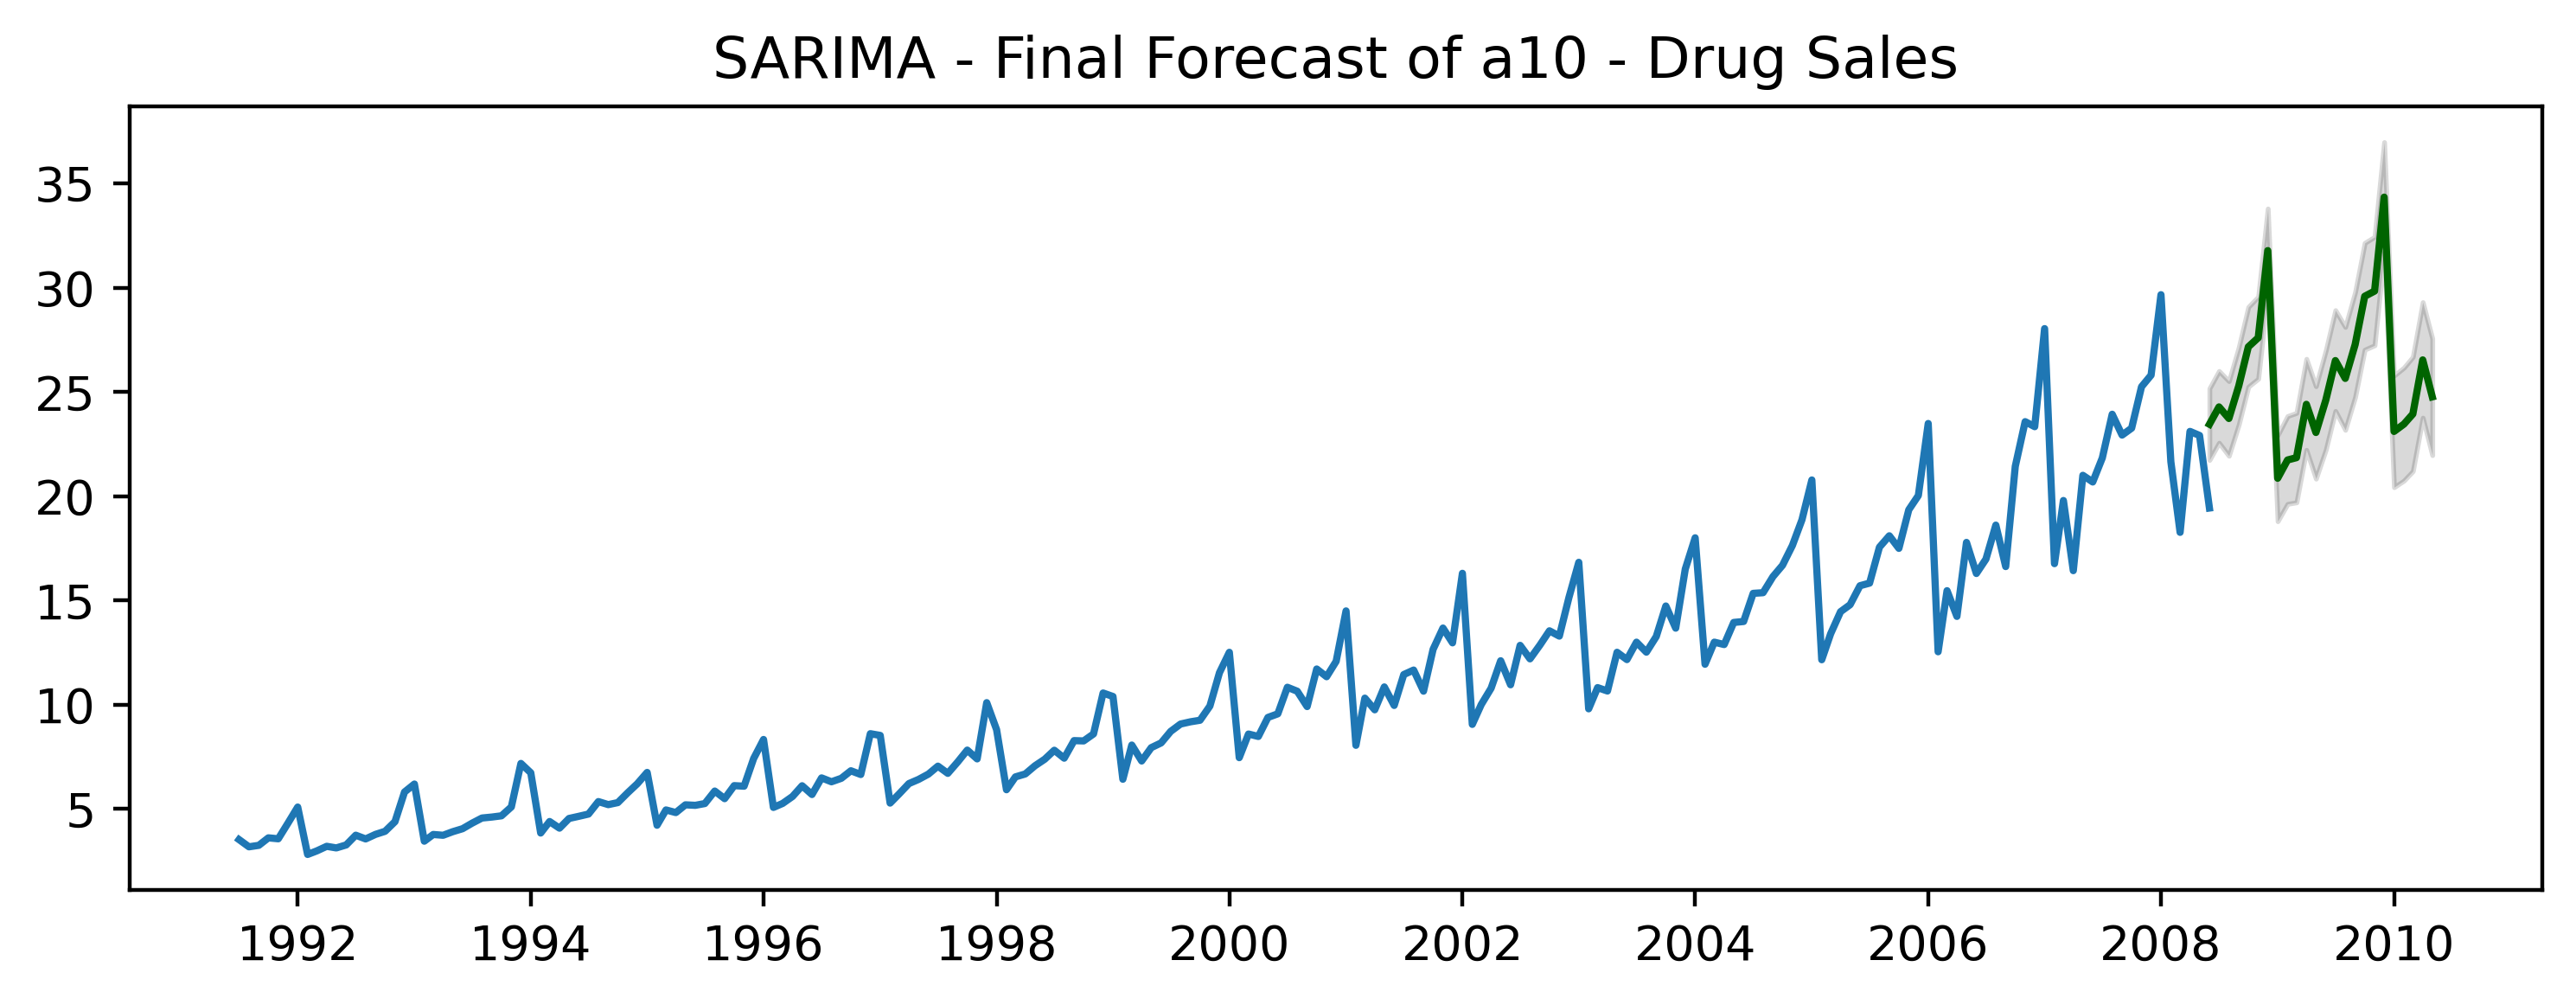

In [68]:
# Forecast
n_periods = 24
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of a10 - Drug Sales")
plt.show()

In [69]:
data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
# Compute Seasonal Index
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

# multiplicative seasonal component
result_mul = seasonal_decompose(data['value'][-36:],   # 3 years
                                model='multiplicative', 
                                extrapolate_trend='freq')

seasonal_index = result_mul.seasonal[-12:].to_frame()
seasonal_index['month'] = pd.to_datetime(seasonal_index.index).month

# merge with the base data
data['month'] = data.index.month
df = pd.merge(data, seasonal_index, how='left', on='month')
df.columns = ['value', 'month', 'seasonal_index']
df.index = data.index  # reassign the index.

In [70]:
import pmdarima as pm

# SARIMAX Model
sxmodel = pm.auto_arima(df[['value']], exogenous=df[['seasonal_index']],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=536.818, Time=1.38 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=626.061, Time=0.05 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=598.068, Time=0.57 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=613.475, Time=0.44 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=759.274, Time=0.13 sec
 ARIMA(1,0,1)(0,1,0)[12] intercept   : AIC=561.407, Time=0.33 sec
 ARIMA(1,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=2.54 sec
 ARIMA(1,0,1)(0,1,2)[12] intercept   : AIC=538.817, Time=4.58 sec
 ARIMA(1,0,1)(1,1,0)[12] intercept   : AIC=545.106, Time=1.44 sec
 ARIMA(1,0,1)(1,1,2)[12] intercept   : AIC=539.560, Time=6.27 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=596.467, Time=0.40 sec
 ARIMA(2,0,1)(0,1,1)[12] intercept   : AIC=531.829, Time=1.86 sec
 ARIMA(2,0,1)(0,1,0)[12] intercept   : AIC=557.198, Time=0.47 sec
 ARIMA(2,0,1)(1,1,1)[12] intercept   : AIC=inf, Time=2.78 sec
 ARIMA(2,0,1)(0,1,2)[12] intercept   : AI

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  204
Model:             SARIMAX(1, 0, 2)x(1, 1, 2, 12)   Log Likelihood                -253.954
Date:                            Thu, 15 Oct 2020   AIC                            525.909
Time:                                    15:38:20   BIC                            555.226
Sample:                                07-01-1991   HQIC                           537.782
                                     - 06-01-2008                                         
Covariance Type:                              opg                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept          0.0052      0.009      0.577      0.564      -0.013       0.023
seasonal_index  1.205e-06    1.2e+04      1e-10      1.000   -2.35e+04    2.35e+04
ar.L1              0.9765      0.019     52.371      0.000       0.940       1.013
ma.L1             -0.9110      0.056    -16.125      0.000      -1.022      -0.800
ma.L2              0.2168      0.059      3.679      0.000       0.101       0.332
ar.S.L12           0.8435      0.155      5.436      0.000       0.539       1.148
ma.S.L12          -1.5854      0.176     -8.993      0.000      -1.931      -1.240
ma.S.L24           0.7676      0.111      6.908      0.000       0.550       0.985
sigma2             0.7474      0.066     11.331      0.000       0.618       0.877
===================================================================================
Ljung-Box (Q):                       68.95   Jarque-Bera (JB):               142.59
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):              14.47   Skew:                             0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [71]:
# Forecast
n_periods = 24
fitted, confint = sxmodel.predict(n_periods=n_periods, 
                                  exogenous=np.tile(seasonal_index.value, 2).reshape(-1,1), 
                                  return_conf_int=True)

index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data['value'])
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMAX Forecast of a10 - Drug Sales")
plt.show()

AttributeError: 'DataFrame' object has no attribute 'value'